<a href="https://colab.research.google.com/github/GIHYEON-KIM/Hello/blob/main/Untitled0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 어떤 게임을 만들어야 할까?

# Key word 참조
- Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
- Sprint 2 : Hypothesis Test, CI, Bayesian
- Sprint 3 : DR, PCA, Cluster

# 반드시 들어가야 하는 내용

- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대한 대답.
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답.
- 매출이 높은 게임에 대한 분석 및 시각화 프로세스 포함.
- 위 3가지 내용과 개인적인 분석 목표, 질문을 추가.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action = 'ignore')

%matplotlib inline



## 데이터 불러오기 및 전처리

데이터 설명
- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미 매출액입니다.
- EU_Sales : 유럽 매출액입니다.
- JP_Sales : 일본 매출액입니다.
- Other_Sales : 기타지역 매출액입니다.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
df.shape

(16598, 9)

### Sales 값에 숫자와 문자가 섞여있어서 K를 기준으로 데이터 변환

In [5]:
df.NA_Sales.unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

In [6]:
new_vals =[]
for item in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
  new_val = []
  for value in df[item].str[0:]:
    if value[-1] == 'M':
      value = value.replace('M', "")
      value = float(value)*1000
      new_val.append(value)

    elif value[-1] == 'K':
      value = value.replace('K', "")
      value = float(value)
      new_val.append(value)

    else :
      value = float(value)*1000
      new_val.append(value)
  new_vals.append(new_val)

new_vals = pd.DataFrame(np.array(new_vals), index = ['NA_Sales(K)', 'EU_Sales(K)', 'JP_Sales(K)', 'Other_Sales(K)']).T
new_vals

,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K)
0,40.0,0.0,0.0,0.0
1,170.0,0.0,0.0,10.0
2,0.0,0.0,20.0,0.0
3,40.0,0.0,0.0,0.0
4,120.0,90.0,0.0,40.0
...,...,...,...,...
16593,150.0,40.0,0.0,10.0
16594,10.0,0.0,0.0,0.0
16595,440.0,190.0,30.0,130.0
16596,50.0,50.0,250.0,30.0


In [7]:
new_vals.describe()

,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K)
count,16598.000000,16598.000000,16598.000000,16598.000000
mean,264.667430,146.652006,77.781660,48.063020
std,816.683029,505.351231,309.290648,188.588403
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,80.000000,20.000000,0.000000,10.000000
75%,240.000000,110.000000,40.000000,40.000000
max,41490.000000,29020.000000,10220.000000,10570.000000


In [8]:
df_new = df.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)
df_new

,Name,Platform,Year,Genre,Publisher
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher
...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei


In [9]:
df_new = pd.concat([df_new, new_vals],axis = 1)
df_new

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K)
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0


In [10]:
df_new['Total_Sales(K)'] = df_new['NA_Sales(K)'] + df_new['EU_Sales(K)'] + df_new['JP_Sales(K)'] + df_new['Other_Sales(K)']
df_new

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0


In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            16598 non-null  object 
 1   Platform        16598 non-null  object 
 2   Year            16327 non-null  float64
 3   Genre           16548 non-null  object 
 4   Publisher       16540 non-null  object 
 5   NA_Sales(K)     16598 non-null  float64
 6   EU_Sales(K)     16598 non-null  float64
 7   JP_Sales(K)     16598 non-null  float64
 8   Other_Sales(K)  16598 non-null  float64
 9   Total_Sales(K)  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [12]:
df_new.isnull().sum()

Name                0
Platform            0
Year              271
Genre              50
Publisher          58
NA_Sales(K)         0
EU_Sales(K)         0
JP_Sales(K)         0
Other_Sales(K)      0
Total_Sales(K)      0
dtype: int64

### 결측값과 Year 처리

In [13]:
df_new = df_new.dropna()
df_new.shape

(16241, 10)

In [14]:
def pre_year(val):
  
  if val < 10:
    val = "200"+str(int(val))
    return int(val)

  elif val<21:
    val = "20"+str(int(val))
    return int(val)

  elif val<100:
    val = "19"+str(int(val))
    return int(val)
    
  else :
    val = str(int(val))
    return int(val)


In [15]:
df_new['Year'] = df_new['Year'].apply(pre_year)

In [16]:
np.sort(df_new['Year'].unique())

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

## EDA

### (필수) 1. 지역에 따라서 선호하는 게임 장르가 다를까?

In [17]:
df_country_genr = df_new[['Genre', 'NA_Sales(K)', 'EU_Sales(K)', 'JP_Sales(K)']]
df_country_genr.head()

,Genre,NA_Sales(K),EU_Sales(K),JP_Sales(K)
0,Action,40.0,0.0,0.0
1,Action,170.0,0.0,0.0
2,Adventure,0.0,0.0,20.0
3,Misc,40.0,0.0,0.0
4,Platform,120.0,90.0,0.0


#### 통계적 검정

In [18]:
df_country_genr = df_country_genr.groupby('Genre').sum()
# df_country_genr = df_country_genr.T
df_country_genr

,NA_Sales(K),EU_Sales(K),JP_Sales(K)
Genre,,,
Action,858750.0,513640.0,156600.0
Adventure,101790.0,63660.0,51870.0
Fighting,220350.0,99900.0,87140.0
Misc,394730.0,208150.0,104180.0
Platform,445380.0,200630.0,130530.0
Puzzle,121580.0,50470.0,56240.0
Racing,354700.0,235020.0,56320.0
Role-Playing,318760.0,183090.0,342930.0
Shooter,574480.0,310230.0,38180.0


In [19]:
from scipy import stats

stats.chi2_contingency(df_country_genr)

(638526.5542907602,
 0.0,
 22,
 array([[826068.87727045, 459074.83621425, 243846.2865153 ],
        [117411.68248871,  65249.70301054,  34658.61450075],
        [220100.98163573, 122317.67213999,  64971.34622429],
        [382003.97671851, 212292.72506272, 112763.29821877],
        [419542.00220773, 233153.89460612, 123844.10318615],
        [123338.45479177,  68543.41386101,  36408.13134722],
        [349036.64345208, 193971.64611139, 103031.71043653],
        [456410.09172102, 253642.75772704, 134727.15055193],
        [498610.65549423, 277095.05987205, 147184.28463372],
        [193395.38866031, 107476.45725038,  57088.15408931],
        [633732.41966884, 352186.86330908, 187070.71702208],
        [ 87388.82589062,  48564.97083542,  25796.20327396]]))

- p_value가 0으로 나왔으므로 귀무가설 기각, 지역마다 선호하는 장르가 다르다는 결론이 나온다.

In [20]:
from scipy import stats

print(stats.ttest_ind(df_country_genr['NA_Sales(K)'], df_country_genr['EU_Sales(K)']))
print(stats.ttest_ind(df_country_genr['NA_Sales(K)'], df_country_genr['JP_Sales(K)']))
print(stats.ttest_ind(df_country_genr['EU_Sales(K)'], df_country_genr['JP_Sales(K)']))

Ttest_indResult(statistic=1.9489574914866241, pvalue=0.0641651210322132)
Ttest_indResult(statistic=3.3840373822724215, pvalue=0.002671109517000371)
Ttest_indResult(statistic=1.9552597127472673, pvalue=0.06337324012838225)


- t-test 결과 NA와 EU / EU와 JP의 평균 매출액은 다르지 않다고 볼 수 있지만, NA와 JP는 차이가 없다고 볼 수 없다. (= 차이가 있다.)
-> 이것은 지역별 장르의 차이 유무를 확인한다기 보다, 지역별로 매출액에 차이가 있는지 (지역별로 게임을 좋아하는 지)를 파악하는 가설 검정이다.

#### 시각화

Text(0.5, 0, 'Genre')

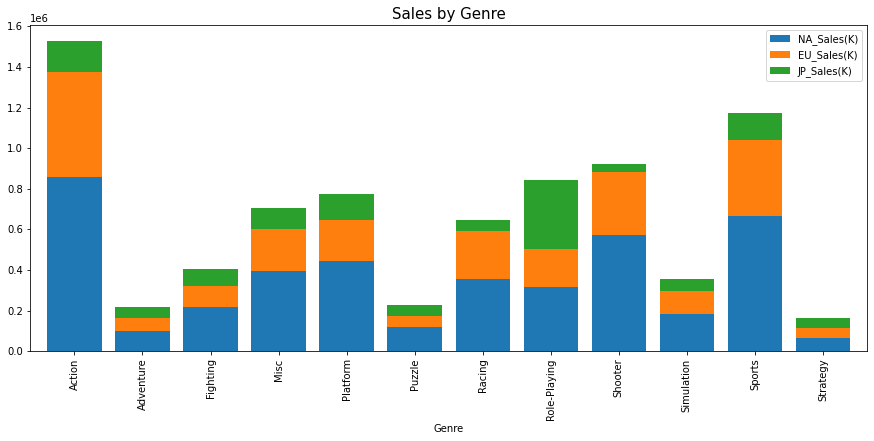

In [21]:
fig, ax = plt.subplots(figsize = (15,6))
ax = df_country_genr.plot.bar(ax = ax, width = .8, stacked = True)
ax.set_title("Sales by Genre", size = 15)
ax.set_xlabel("Genre")

Text(0.5, 0, 'Sales')

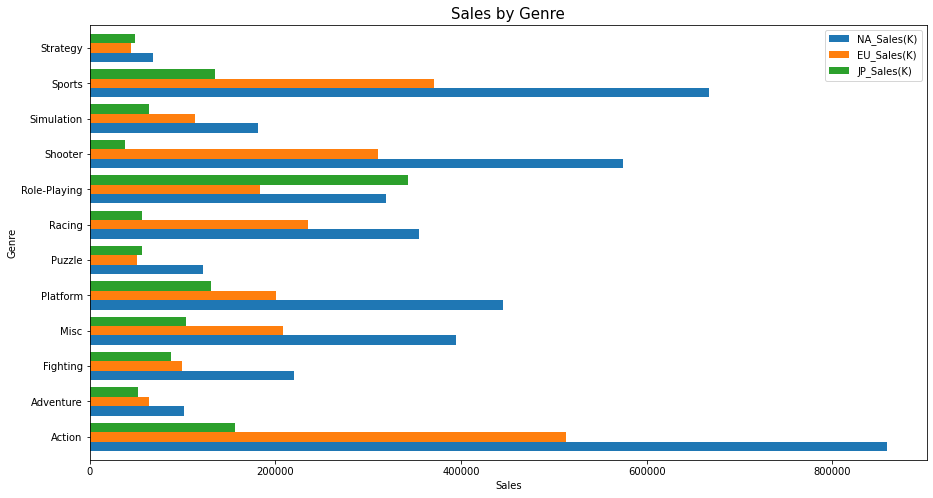

In [22]:
fig, ax = plt.subplots(figsize = (15,8))
ax = df_country_genr.plot.barh(ax = ax, width = .8)
ax.set_title("Sales by Genre", size = 15)
ax.set_xlabel("Sales")

#### 결론

- 그래프로 본 결과, NA와 EU는 3등까지는 선호도가 Action, Sports, Shooter로  같으나 4등부터 차이가 발생했고, JP지역은 다른 지역들과 달리 Role-Playing이 1위를 차지했다.

### (필수) 2. 연도별 게임의 트렌드가 있을까?

#### 통계적 검정

In [23]:
df_sort_y = df_new.sort_values(by = 'Year')
df_sort_y.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
14264,Boxing,2600,1980,Fighting,Activision,720.0,40.0,0.0,10.0,770.0
5723,Asteroids,2600,1980,Shooter,Atari,4000.0,260.0,0.0,50.0,4310.0
15012,Missile Command,2600,1980,Shooter,Atari,2560.0,170.0,0.0,30.0,2760.0
9226,Bridge,2600,1980,Misc,Activision,250.0,20.0,0.0,0.0,270.0
13133,Freeway,2600,1980,Action,Activision,320.0,20.0,0.0,0.0,340.0


(가설)연도와 장르별 총 매출액(인기 순위)이 상관이 있다.

In [24]:
df_y_g_t = pd.pivot_table(data=df_new, index = 'Year', columns = 'Genre', values = 'Total_Sales(K)', aggfunc = 'sum')
df_y_g_t = df_y_g_t.fillna(0)
df_y_g_t.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,340.0,0.0,770.0,2700.0,0.0,0.0,0.0,0.0,7070.0,0.0,0.0,0.0
1981,14790.0,0.0,0.0,0.0,6920.0,2250.0,480.0,0.0,10020.0,440.0,780.0,0.0
1982,6500.0,0.0,0.0,870.0,5030.0,10040.0,1570.0,0.0,3810.0,0.0,1060.0,0.0
1983,2860.0,400.0,0.0,2140.0,6930.0,780.0,0.0,0.0,490.0,0.0,3200.0,0.0
1984,1850.0,0.0,0.0,1450.0,690.0,3140.0,5950.0,0.0,31100.0,0.0,6170.0,0.0


In [25]:
from scipy import stats
stats.chi2_contingency(df_y_g_t)

(3401604.5597475637,
 0.0,
 418,
 array([[2.12866188e+03, 2.90808681e+02, 5.51172046e+02, 9.68906625e+02,
         1.02891496e+03, 2.99146969e+02, 8.97888267e+02, 1.12027576e+03,
         1.27342191e+03, 4.83744993e+02, 1.62210154e+03, 2.14956353e+02],
        [6.98075883e+03, 9.53681409e+02, 1.80752009e+03, 3.17744379e+03,
         3.37423583e+03, 9.81026090e+02, 2.94454535e+03, 3.67384551e+03,
         4.17607480e+03, 1.58639902e+03, 5.31953889e+03, 7.04930391e+02],
        [5.65034515e+03, 7.71925984e+02, 1.46303756e+03, 2.57187715e+03,
         2.73116398e+03, 7.94059235e+02, 2.38336518e+03, 2.97367316e+03,
         3.38018610e+03, 1.28405840e+03, 4.30572542e+03, 5.70582671e+02],
        [3.28690438e+03, 4.49042816e+02, 8.51074483e+02, 1.49610582e+03,
         1.58876575e+03, 4.61918114e+02, 1.38644512e+03, 1.72983757e+03,
         1.96631325e+03, 7.46959180e+02, 2.50471562e+03, 3.31917897e+02],
        [9.85093069e+03, 1.34579201e+03, 2.55069049e+03, 4.48386476e+03,
         4.761

- chi 검정 결과 연도와 장르는 연관이 있다. (연도별로 선호 장르가 달라진다.)

#### 시각화

In [26]:
df_y_g_t.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,340.0,0.0,770.0,2700.0,0.0,0.0,0.0,0.0,7070.0,0.0,0.0,0.0
1981,14790.0,0.0,0.0,0.0,6920.0,2250.0,480.0,0.0,10020.0,440.0,780.0,0.0
1982,6500.0,0.0,0.0,870.0,5030.0,10040.0,1570.0,0.0,3810.0,0.0,1060.0,0.0
1983,2860.0,400.0,0.0,2140.0,6930.0,780.0,0.0,0.0,490.0,0.0,3200.0,0.0
1984,1850.0,0.0,0.0,1450.0,690.0,3140.0,5950.0,0.0,31100.0,0.0,6170.0,0.0


각 년도별 가장 매출액이 큰 장르를 뽑았다.

In [27]:
results = []
for year in df_y_g_t.index:
  # for arr in df_y_g_t.loc[year]:
  for feature in df_y_g_t.columns:
    if df_y_g_t.loc[year, feature] == df_y_g_t.loc[year].max():
      results.append([year, feature, df_y_g_t.loc[year].max()])
  continue
  

df_max_by_y = pd.DataFrame(results)

df_max_by_y = df_max_by_y.rename(columns = {0 : 'Year', 1 : 'Genre', 2 : 'Total_Sales(K)'})
df_max_by_y.tail()

,Year,Genre,Total_Sales(K)
34,2014,Action,99010.0
35,2015,Action,68250.0
36,2016,Action,19840.0
37,2017,Role-Playing,40.0
38,2020,Simulation,290.0


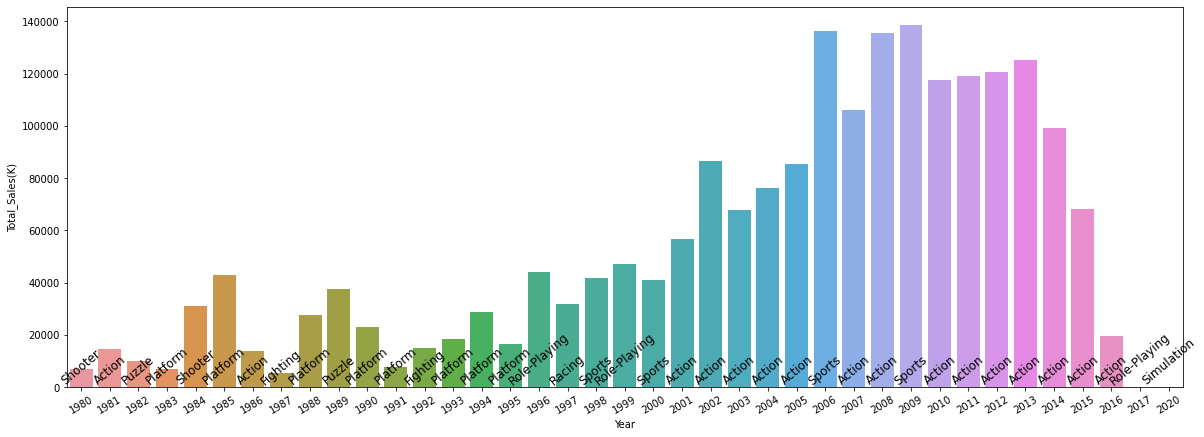

In [28]:
plt.figure(figsize = (20,7))
sns.barplot(data = df_max_by_y, x = 'Year', y = 'Total_Sales(K)')
plt.xticks(rotation = 30)
for i in range(len(df_max_by_y['Genre'])):
  plt.annotate(df_max_by_y['Genre'][i], xy = [i,0],  va = 'bottom', ha = "center", fontsize = 12, rotation = 40)

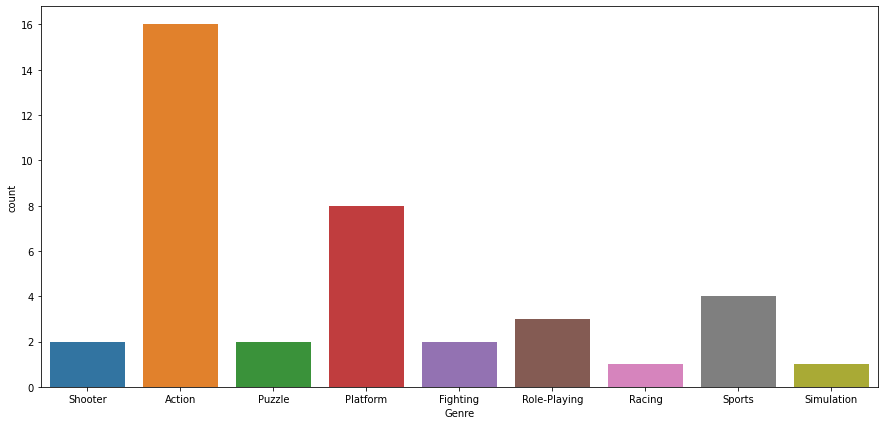

In [29]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_max_by_y, x = 'Genre')

Action, Platform, Sports 장르의 연도별 매출액 변화

In [30]:
df_act = df_new[df_new['Genre'] == 'Action']
df_act = df_act.groupby('Year').sum()
df_act = df_act.reset_index()

df_Pl = df_new[df_new['Genre'] == 'Platform']
df_Pl = df_Pl.groupby('Year').sum()
df_Pl = df_Pl.reset_index()

df_sp = df_new[df_new['Genre'] == 'Sports']
df_sp = df_sp.groupby('Year').sum()
df_sp = df_sp.reset_index()

df_rp = df_new[df_new['Genre'] == 'Role-Playing']
df_rp = df_rp.groupby('Year').sum()
df_rp = df_rp.reset_index()

df_ft = df_new[df_new['Genre'] == 'Fighting']
df_ft = df_ft.groupby('Year').sum()
df_ft = df_ft.reset_index()

df_pz = df_new[df_new['Genre'] == 'Puzzle']
df_pz = df_pz.groupby('Year').sum()
df_pz = df_pz.reset_index()

df_sh = df_new[df_new['Genre'] == 'Shooter']
df_sh = df_sh.groupby('Year').sum()
df_sh = df_sh.reset_index()

df_rc = df_new[df_new['Genre'] == 'Racing']
df_rc = df_rc.groupby('Year').sum()
df_rc = df_rc.reset_index()

df_sm = df_new[df_new['Genre'] == 'Simulation']
df_sm = df_sm.groupby('Year').sum()
df_sm = df_sm.reset_index()
df_sm.head()

,Year,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
0,1981,420.0,20.0,0.0,0.0,440.0
1,1985,0.0,30.0,0.0,10.0,40.0
2,1988,0.0,20.0,0.0,10.0,30.0
3,1990,460.0,170.0,480.0,20.0,1130.0
4,1991,930.0,270.0,910.0,40.0,2150.0


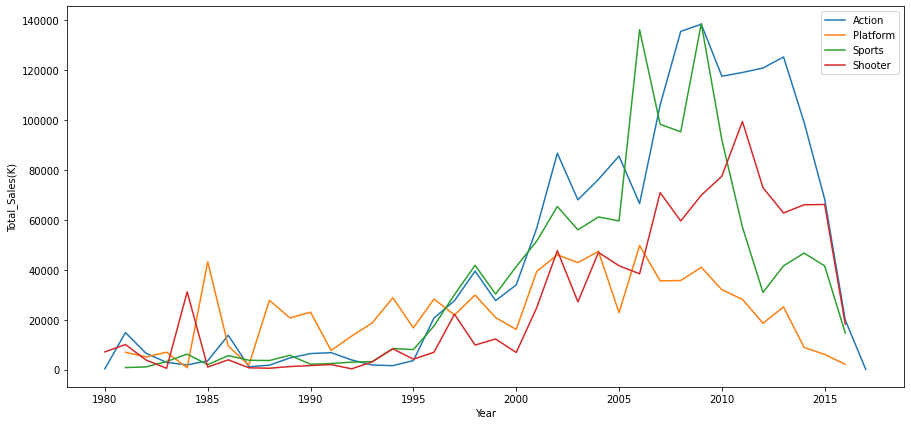

In [31]:
fig, ax = plt.subplots(figsize = (15,7))

ax = sns.lineplot(data = df_act, x = 'Year', y = 'Total_Sales(K)')
ax = sns.lineplot(data = df_Pl,  x = 'Year', y = 'Total_Sales(K)')
ax = sns.lineplot(data = df_sp,  x = 'Year', y = 'Total_Sales(K)')
# ax = sns.lineplot(data = df_rp,  x = 'Year', y = 'Total_Sales(K)')
# ax = sns.lineplot(data = df_ft,  x = 'Year', y = 'Total_Sales(K)')
# ax = sns.lineplot(data = df_pz,  x = 'Year', y = 'Total_Sales(K)')
ax = sns.lineplot(data = df_sh,  x = 'Year', y = 'Total_Sales(K)')
# ax = sns.lineplot(data = df_rc,  x = 'Year', y = 'Total_Sales(K)')
# ax = sns.lineplot(data = df_sm,  x = 'Year', y = 'Total_Sales(K)')
ax.legend(['Action', 'Platform', 'Sports', 'Shooter'])


- 1995년도 까지는 Mario와 Donkey Kong 등 Platform 장르가 인기였지만 그 이후 Sports와 Action 장르의 인기가 높아졌다.

#### 누적 매출액

In [32]:
df_tot_genr = df_new[['Genre', 'Total_Sales(K)']]
df_tot_genr = df_tot_genr.groupby('Genre').sum()
df_tot_genr = df_tot_genr.sort_values('Total_Sales(K)', ascending = False)
df_tot_genr

,Total_Sales(K)
Genre,
Action,1712980.0
Sports,1305340.0
Shooter,1024750.0
Role-Playing,901510.0
Platform,827990.0
Misc,779700.0
Racing,722550.0
Fighting,443540.0
Simulation,389280.0


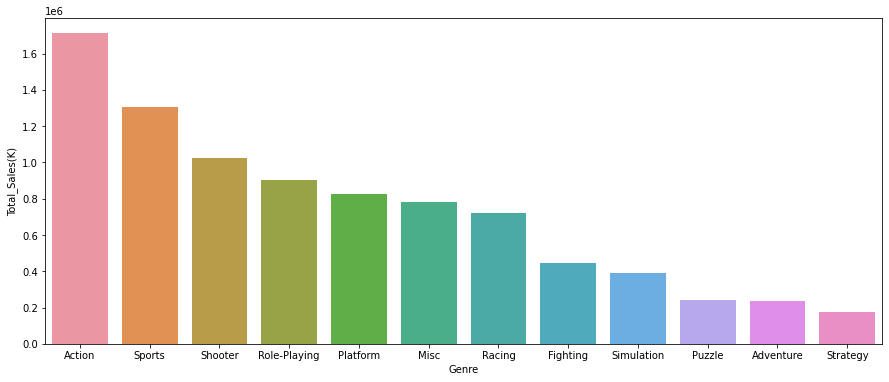

In [33]:
plt.figure(figsize = (15,6))
sns.barplot(data=df_tot_genr.reset_index(), x='Genre', y = 'Total_Sales(K)')

- 과거부터 현재까지 누적 매출액은 Action, Sports, Shooter, Role-Playing, Platform 순이다.

#### 연도별 장르 변화

In [34]:
df_sort_y_g = df_sort_y.groupby(['Year', 'Genre']).sum()
df_sort_y_g = df_sort_y_g.sort_values(['Year','Total_Sales(K)'],ascending = False).reset_index()[['Year', 'Genre','Total_Sales(K)']]
df_sort_y_g

,Year,Genre,Total_Sales(K)
0,2020,Simulation,290.0
1,2017,Role-Playing,40.0
2,2017,Action,10.0
3,2016,Action,19840.0
4,2016,Shooter,18170.0
...,...,...,...
383,1981,Simulation,440.0
384,1980,Shooter,7070.0
385,1980,Misc,2700.0
386,1980,Fighting,770.0


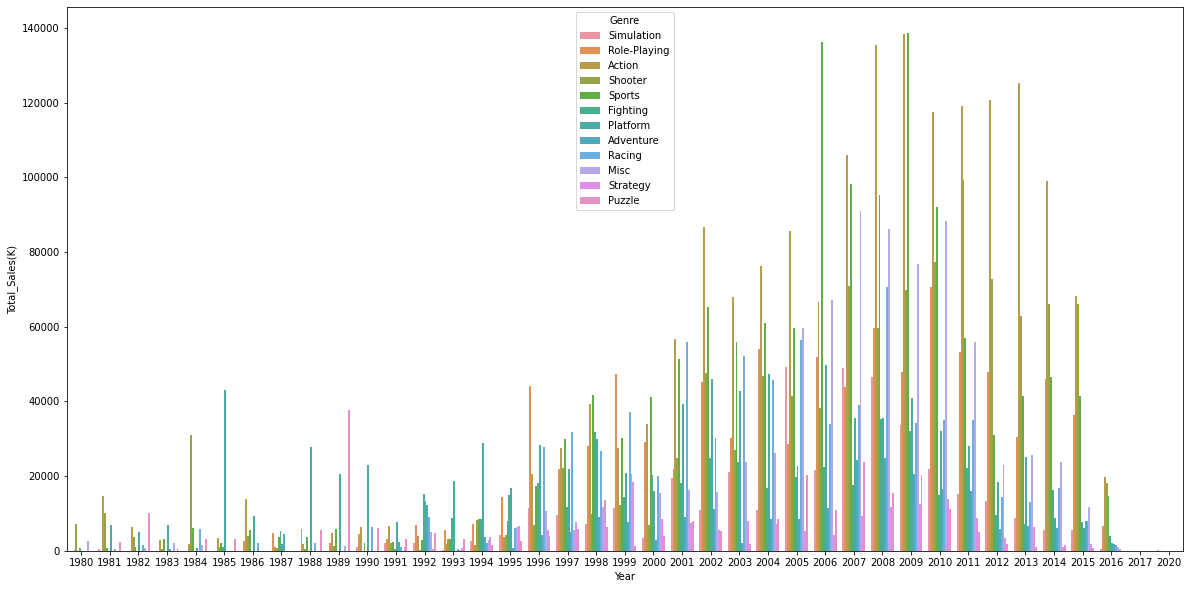

In [35]:
plt.figure(figsize = (20, 10))
sns.barplot(data = df_sort_y_g, x = 'Year', y = 'Total_Sales(K)', hue = 'Genre')

- 연도가 너무 많아서 보기 힘들다.
-> 10년 or 5년 정도씩 끊어서 확인해보자.

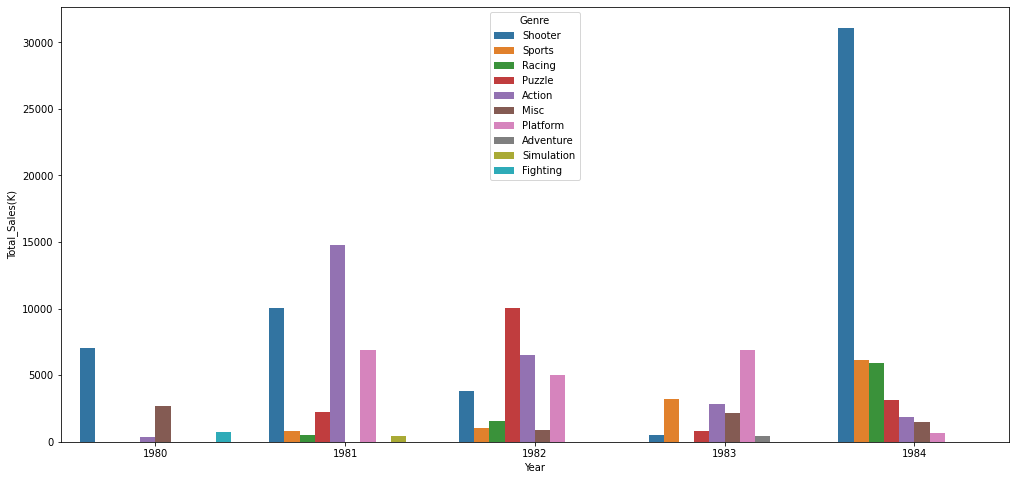

In [36]:
plt.figure(figsize = (17,8))
sns.barplot(data = df_sort_y_g[df_sort_y_g['Year']<1985], x = 'Year', y = 'Total_Sales(K)', hue = 'Genre')

In [37]:
df_new[(df_new['Year'] == 1984) & (df_new['Genre'] == 'Shooter')]

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26930.0,630.0,280.0,470.0,28310.0
10615,Xevious,NES,1984,Shooter,Namco Bandai Games,180.0,60.0,1270.0,10.0,1520.0
13100,Hogan's Alley,NES,1984,Shooter,Nintendo,680.0,160.0,410.0,20.0,1270.0


- 1984년에 Nintendo사의 Duck Hunt라는 게임이 히트를 쳐서 Shooter 장르의 매출이 높았다.

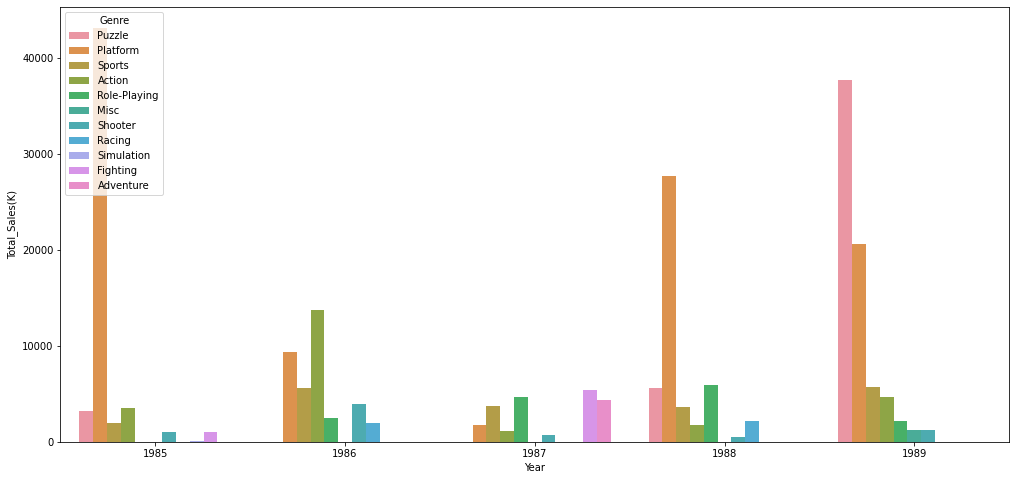

In [38]:
plt.figure(figsize = (17,8))
sns.barplot(data = df_sort_y_g[(df_sort_y_g['Year']>=1985) & (df_sort_y_g['Year']<1990)], x = 'Year', y = 'Total_Sales(K)', hue = 'Genre')

In [39]:
df_new[(df_new['Year'] == 1985) & (df_new['Genre'] == 'Platform')]

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
76,Wrecking Crew,NES,1985,Platform,Nintendo,0.0,0.0,510.0,0.0,510.0
3204,Balloon Fight,NES,1985,Platform,Nintendo,390.0,90.0,430.0,10.0,920.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
13710,Ice Climber,NES,1985,Platform,Nintendo,460.0,100.0,920.0,20.0,1500.0


- 1985년에는 Nintendo 사의 Super Mario Bros.가 히트를 쳐서 Platform 장르가 가장 인기가 높았다.

In [40]:
df_new[(df_new['Year'] == 1986) & ((df_new['Genre'] == 'Action') | (df_new['Genre'] == 'Platform')) ].sort_values('Total_Sales(K)', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
10791,The Legend of Zelda,NES,1986,Action,Nintendo,3740.0,930.0,1690.0,140.0,6500.0
2894,Metroid,NES,1986,Action,Nintendo,1330.0,310.0,1040.0,50.0,2730.0
8420,Super Mario Bros.: The Lost Levels,NES,1986,Platform,Nintendo,0.0,0.0,2650.0,0.0,2650.0
3418,Kid Icarus,NES,1986,Platform,Nintendo,530.0,120.0,1090.0,20.0,1760.0
10742,Ghosts 'n Goblins,NES,1986,Action,Capcom,740.0,260.0,610.0,30.0,1640.0
4880,Ninja Hattori Kun: Ninja wa Shuugyou Degogiru ...,NES,1986,Platform,Hudson Soft,0.0,0.0,1500.0,0.0,1500.0
6777,Castlevania,NES,1986,Platform,Konami Digital Entertainment,540.0,60.0,620.0,10.0,1230.0
7061,Ganbare Goemon! Karakuri Douchuu,NES,1986,Platform,Konami Digital Entertainment,0.0,0.0,1200.0,0.0,1200.0
3226,Doraemon,NES,1986,Action,Hudson Soft,0.0,0.0,1150.0,0.0,1150.0
16193,Commando,NES,1986,Action,Capcom,710.0,160.0,250.0,30.0,1150.0


- 1986년에는 Nintendo 사의 The Legend of Zelda와 Metroid가 동회사의 Super Mario Bros 시리즈를 앞지르며 Action 장르의 인기가 높아졌다.

In [41]:
df_new[(df_new['Year'] == 1988) & (df_new['Genre'] == 'Platform')]

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
6802,Donkey Kong Classics,NES,1988,Platform,Nintendo,590.0,140.0,810.0,20.0,1560.0
7494,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5390.0,1180.0,700.0,190.0,7460.0
11375,Disney's DuckTales,GB,1988,Platform,Capcom,820.0,230.0,350.0,30.0,1430.0
14856,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9540.0,3440.0,3840.0,460.0,17280.0


- 1988년에는 Nintendo 사의 Super Mario Bros 2 & 3가 히트를 치며, 높은 매출을 달성하고 Platform 장르의 인기를 높였다.

In [42]:
df_new[(df_new['Year'] == 1989) & ((df_new['Genre'] == 'Puzzle') | (df_new['Genre'] == 'Platform')) ].sort_values('Total_Sales(K)', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
1203,Tetris,GB,1989,Puzzle,Nintendo,23200.0,2260.0,4220.0,580.0,30260.0
9491,Super Mario Land,GB,1989,Platform,Nintendo,10830.0,2710.0,4180.0,420.0,18140.0
11689,Dr. Mario,GB,1989,Puzzle,Nintendo,2180.0,960.0,2000.0,200.0,5340.0
10879,Alleyway,GB,1989,Puzzle,Nintendo,960.0,380.0,550.0,50.0,1940.0
8388,Disney's DuckTales,NES,1989,Platform,Capcom,910.0,300.0,420.0,40.0,1670.0
10802,Castlevania III: Dracula's Curse,NES,1989,Platform,Konami Digital Entertainment,400.0,70.0,370.0,10.0,850.0
15952,Klax,2600,1989,Puzzle,Atari,140.0,10.0,0.0,0.0,150.0
6086,Adventures of Lolo,NES,1989,Puzzle,HAL Laboratory,60.0,0.0,0.0,0.0,60.0


- 1989년에는 Nintendo 사가 Super Mario Land라는 새로운 시리즈를 내며 Platform 장르의 인기를 꾸준히 이어가고 있다.
- 하지만 Nintendo 사의 Tetris가 유행을 하며 Puzzle 장르의 인기가 가장 높았다.
- 또한, Mario Bros의 캐릭터를 활용한 Dr.Mario라는 게임도 출시하며 Puzzle 장르의 매출을 높였다.

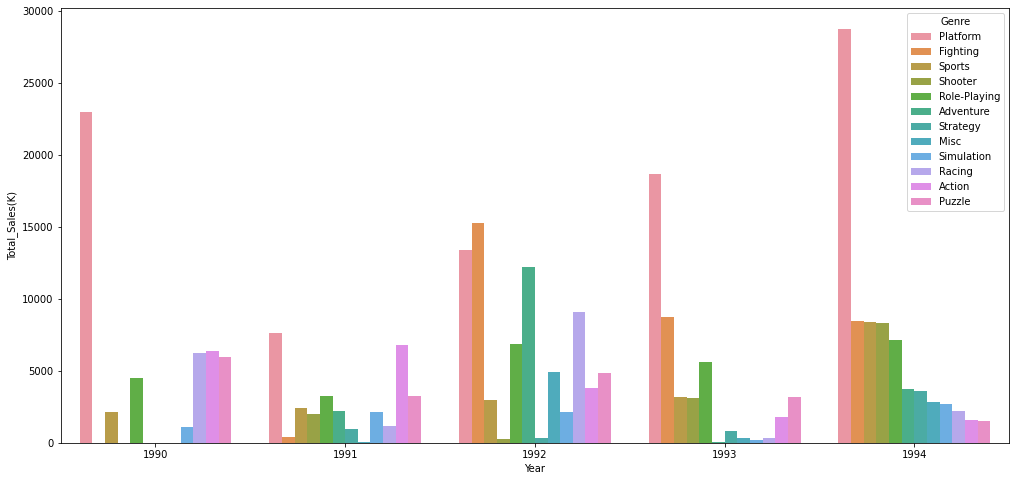

In [43]:
plt.figure(figsize = (17,8))
sns.barplot(data = df_sort_y_g[(df_sort_y_g['Year']>=1990) & (df_sort_y_g['Year']<1995)], x = 'Year', y = 'Total_Sales(K)', hue = 'Genre')

- 1990 ~ 1994년 동안은 Platfrom 장르가 항상 높은 순위의 인기를 보이고 있다.
- Fighting 장르도 급부상했으나 시간이 지날수록 인기가 떨어지고 있다.

In [44]:
df_new[(df_new['Year'] == 1990)].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
13111,Super Mario World,SNES,1990,Platform,Nintendo,12780.0,3750.0,3540.0,550.0,20620.0
2518,Dr. Mario,NES,1990,Puzzle,Nintendo,2620.0,600.0,1520.0,100.0,4840.0
14013,F-1 Race,GB,1990,Racing,Nintendo,1730.0,690.0,590.0,400.0,3410.0
2542,Dragon Warrior IV,NES,1990,Role-Playing,Enix Corporation,80.0,0.0,3030.0,10.0,3120.0
12855,F-Zero,SNES,1990,Racing,Nintendo,1370.0,510.0,890.0,70.0,2840.0


- 1990년에는 Nintendo 사가 새로 출시한 Super Mario World가 Platform 장르의 인기를 다시 높였다.

In [45]:
df_new[(df_new['Year'] == 1991)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
5551,The Legend of Zelda: A Link to the Past,SNES,1991,Action,Nintendo,2420.0,910.0,1150.0,130.0,4610.0
14729,Sonic the Hedgehog,GEN,1991,Platform,Sega,3030.0,910.0,260.0,130.0,4330.0
373,SimCity,SNES,1991,Simulation,Nintendo,930.0,270.0,750.0,40.0,1990.0
8036,Final Fantasy II,SNES,1991,Role-Playing,Square,240.0,90.0,1330.0,120.0,1780.0
1865,Metroid II: Return of Samus,GB,1991,Adventure,Nintendo,850.0,310.0,560.0,40.0,1760.0
7204,Yoshi,NES,1991,Puzzle,Nintendo,700.0,130.0,910.0,10.0,1750.0
3267,Super Scope 6,SNES,1991,Shooter,Nintendo,1060.0,380.0,150.0,50.0,1640.0
1144,Teenage Mutant Ninja Turtles III: The Manhatta...,NES,1991,Action,Konami Digital Entertainment,1050.0,170.0,150.0,20.0,1390.0
3621,Super Ghouls 'n Ghosts,SNES,1991,Platform,Capcom,500.0,140.0,520.0,20.0,1180.0
6415,Super R.C. Pro-Am,GB,1991,Racing,Nintendo,580.0,370.0,150.0,40.0,1140.0


- 1991년에는 Nintendo 사의 젤다의 전설과 Sega 사의 소닉이 비슷하게 히트를 치며 Action 장르와 Platform 장르가 비슷한 인기를 유지했다.

In [46]:
df_new[(df_new['Year'] == 1992)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
6847,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6160.0,2040.0,2690.0,290.0,11180.0
9582,Super Mario Kart,SNES,1992,Racing,Nintendo,3540.0,1240.0,3810.0,180.0,8770.0
12568,Street Fighter II: The World Warrior,SNES,1992,Fighting,Capcom,2470.0,830.0,2870.0,120.0,6290.0
5040,Sonic the Hedgehog 2,GEN,1992,Platform,Sega,4470.0,1200.0,160.0,190.0,6020.0
14336,Kirby's Dream Land,GB,1992,Platform,Nintendo,2710.0,610.0,1700.0,110.0,5130.0
4920,Street Fighter II Turbo,SNES,1992,Fighting,Capcom,1420.0,510.0,2100.0,70.0,4100.0
13173,The Legend of Zelda: Link's Awakening,GB,1992,Action,Nintendo,2210.0,960.0,540.0,130.0,3840.0
9601,Dragon Quest V: Tenkuu no Hanayome,SNES,1992,Role-Playing,Enix Corporation,0.0,0.0,2780.0,10.0,2790.0
3930,Mario Paint,SNES,1992,Misc,Nintendo,1430.0,540.0,710.0,70.0,2750.0
12401,Mortal Kombat,GEN,1992,Fighting,Arena Entertainment,1950.0,630.0,0.0,90.0,2670.0


- 1992년에는 Nintendo 사의 Super Mario Land 2가 인기 2~3위 장르인 게임들에 비해 약 2배 정도 많이 팔려서 Adventure 장르도 인기가 높아졌다.
- 하지만 Capcom 사의 Street Fighter 2를 비롯한 다양한 Fighting 장르의 게임이 출시되며 Fighting 장르의 인기가 가장 높았다.
- 또한, Sega 사의 Sonic the Hedgehog 2를 비롯한 Platform 장르의 게임 또한 여전히 인기가 높았다.

- 또 한가지 흥미로운 점은, 1992년에 Racing 장르의 인기가 급격히 높아졌는데, Nintendo 사의 Super Mario Kart가 원인이었다.
- 단일 매출로만 보면 Fighting과 Platform 장르의 게임들보다 매출이 높았다.

In [47]:
df_new[(df_new['Year'] == 1993)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
3007,Super Mario All-Stars,SNES,1993,Platform,Nintendo,5990.0,2150.0,2120.0,290.0,10550.0
5260,Star Fox,SNES,1993,Shooter,Nintendo,1610.0,510.0,800.0,70.0,2990.0
1521,Super Street Fighter II,SNES,1993,Fighting,Nintendo,520.0,160.0,1290.0,30.0,2000.0
8006,Mortal Kombat II,SNES,1993,Fighting,Acclaim Entertainment,1480.0,390.0,0.0,60.0,1930.0
5835,Secret of Mana,SNES,1993,Role-Playing,SquareSoft,250.0,70.0,1490.0,20.0,1830.0
11552,Disney's Aladdin,SNES,1993,Platform,Capcom,940.0,340.0,210.0,270.0,1760.0
7963,Kirby's Adventure,NES,1993,Platform,Nintendo,790.0,140.0,800.0,20.0,1750.0
4005,Super Puyo Puyo,SNES,1993,Puzzle,Banpresto,0.0,0.0,1690.0,10.0,1700.0
10949,Sonic CD,SCD,1993,Platform,Sega,1000.0,360.0,90.0,50.0,1500.0
2237,Dragon Ball Z,SNES,1993,Fighting,Namco Bandai Games,0.0,0.0,1450.0,0.0,1450.0


- 1993년에는 Nintendo 사의 Super Mario 시리즈가 또 다시 높은 매출을 보이며 Platform 장르의 인기를 유지했다.

In [48]:
df_new[(df_new['Year'] == 1994)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
7128,Donkey Kong Country,SNES,1994,Platform,Nintendo,4360.0,1710.0,3000.0,230.0,9300.0
11576,Super Mario Land 3: Wario Land,GB,1994,Platform,Nintendo,2490.0,980.0,1570.0,150.0,5190.0
13051,Donkey Kong Land,GB,1994,Platform,Nintendo,1970.0,760.0,1070.0,110.0,3910.0
6040,Doom II: Hell on Earth,PC,1994,Shooter,Virgin Interactive,2050.0,1400.0,0.0,160.0,3610.0
1868,Final Fantasy III,SNES,1994,Role-Playing,SquareSoft,860.0,0.0,2550.0,20.0,3430.0
16442,Donkey Kong,GB,1994,Platform,Nintendo,1570.0,620.0,550.0,340.0,3080.0
9554,Myst,PC,1994,Adventure,Red Orb,20.0,2790.0,0.0,0.0,2810.0
9685,Monopoly,PC,1994,Misc,Hasbro Interactive,1490.0,810.0,0.0,100.0,2400.0
11231,Warcraft: Orcs & Humans,PC,1994,Strategy,Activision,890.0,1080.0,0.0,110.0,2080.0
14505,Star Wars: Dark Forces,PC,1994,Shooter,LucasArts,1090.0,770.0,0.0,90.0,1950.0


- 1994년에는, Nintendo 사의 Donkey Kong 시리즈가 3개 모두 좋은 성적을 거뒀고, Super Mario Land 3 또한 높은 매출을 보이며 Platform 장르의 압도적인 인기를 얻게 했다.

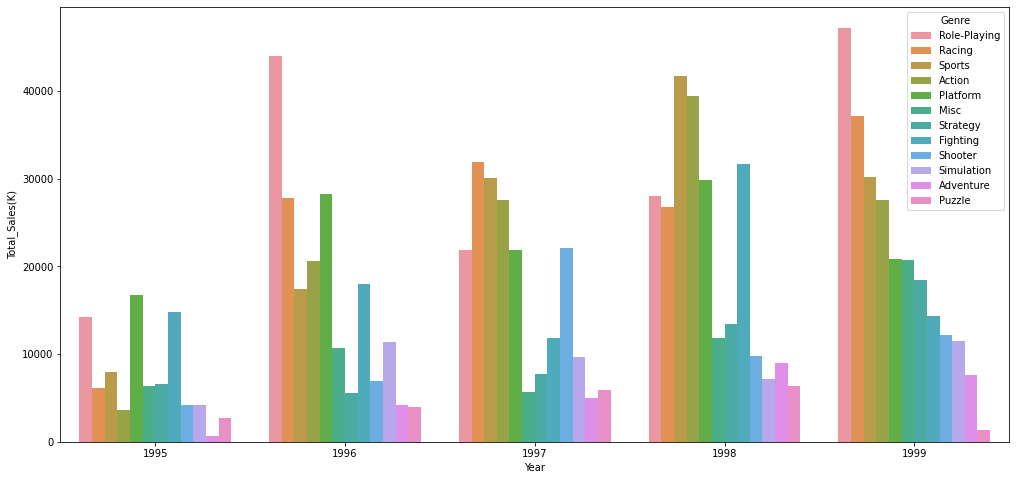

In [49]:
plt.figure(figsize = (17,8))
sns.barplot(data = df_sort_y_g[(df_sort_y_g['Year']>=1995) & (df_sort_y_g['Year']<2000)], x = 'Year', y = 'Total_Sales(K)', hue = 'Genre')

- 1995 ~ 1999년 까지는 Role-Playing과 Sports 장르

In [50]:
df_new[(df_new['Year'] == 1995)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
2173,Donkey Kong Country 2: Diddy's Kong Quest,SNES,1995,Platform,Nintendo,2100.0,740.0,2200.0,110.0,5150.0
4789,Warcraft II: Tides of Darkness,PC,1995,Strategy,Activision,1700.0,2270.0,0.0,230.0,4200.0
10127,Super Mario World 2: Yoshi's Island,SNES,1995,Platform,Nintendo,1650.0,610.0,1760.0,90.0,4110.0
12397,Namco Museum Vol.1,PS,1995,Misc,Sony Computer Entertainment,2120.0,1440.0,220.0,60.0,3840.0
2115,Tekken,PS,1995,Fighting,Sony Computer Entertainment,950.0,1300.0,770.0,220.0,3240.0
14152,Killer Instinct,SNES,1995,Fighting,Nintendo,2260.0,720.0,120.0,100.0,3200.0
11345,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,Enix Corporation,0.0,0.0,3190.0,0.0,3190.0
12926,Rayman,PS,1995,Platform,Ubisoft,1540.0,1330.0,0.0,160.0,3030.0
10535,Kirby's Dream Land 2,GB,1995,Platform,Nintendo,690.0,140.0,1480.0,50.0,2360.0
13420,Chrono Trigger,SNES,1995,Role-Playing,SquareSoft,280.0,0.0,2020.0,10.0,2310.0


- 1995년에는 Nintendo 사의 Donkey Kong 시리즈와 Super Mario World 시리즈가 좋은 성적을 보이며 Platform 장르의 인기를 유지했다.
- Sony 사의 Fighting 장르 게임인 Tekken과 Enix 사의 Role-Playing 장르인 Dragon Quest VI도 비슷한 성적을 내며 3개의 장르가 비슷한 인기를 얻었다.

In [51]:
df_new[(df_new['Year'] == 1996)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
6458,Super Mario 64,N64,1996,Platform,Nintendo,6910.0,2850.0,1910.0,230.0,11900.0
577,Mario Kart 64,N64,1996,Racing,Nintendo,5550.0,1940.0,2230.0,150.0,9870.0
9153,Crash Bandicoot,PS,1996,Platform,Sony Computer Entertainment,3230.0,2350.0,940.0,300.0,6820.0
7444,Tekken 2,PS,1996,Fighting,Sony Computer Entertainment,2260.0,1890.0,1360.0,230.0,5740.0
11566,Microsoft Flight Simulator,PC,1996,Simulation,Microsoft Game Studios,3220.0,1690.0,0.0,200.0,5110.0
2298,Resident Evil,PS,1996,Action,Virgin Interactive,2050.0,1160.0,1110.0,730.0,5050.0
562,Tomb Raider,PS,1996,Action,Eidos Interactive,2290.0,1970.0,130.0,240.0,4630.0
2971,Namco Museum Vol.3,PS,1996,Misc,Sony Computer Entertainment,2280.0,1550.0,160.0,60.0,4050.0
6167,Resident Evil Director's Cut,PS,1996,Action,Virgin Interactive,1820.0,1240.0,470.0,250.0,3780.0


- 1996년에는 Nintendo 사의 새로운 게임인 Pokemon시리즈가 등장하며 Role-Playing 장르가 압도적인 인기를 얻었다.
- Nintendo 사의 Super Mario 64와 Mario Kart 64또한 매출 2, 3등을 기록하며 Racing과 Platform 장르의 인기를 높였다.

In [52]:
df_new[(df_new['Year'] == 1997)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
4809,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4020.0,3870.0,2540.0,520.0,10950.0
11704,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3010.0,2470.0,3280.0,960.0,9720.0
12000,GoldenEye 007,N64,1997,Shooter,Nintendo,5800.0,2010.0,130.0,150.0,8090.0
1098,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3780.0,2170.0,1310.0,310.0,7570.0
595,Tomb Raider II,PS,1997,Action,Eidos Interactive,2300.0,2460.0,200.0,280.0,5240.0
5630,Diddy Kong Racing,N64,1997,Racing,Nintendo,2910.0,990.0,890.0,100.0,4890.0
1045,Frogger,PS,1997,Action,Hasbro Interactive,3790.0,270.0,0.0,110.0,4170.0
1122,Half-Life,PC,1997,Shooter,Vivendi Games,4030.0,0.0,90.0,0.0,4120.0
3967,Star Fox 64,N64,1997,Shooter,Nintendo,2780.0,580.0,640.0,40.0,4040.0
11308,Croc: Legend of the Gobbos,PS,1997,Platform,Fox Interactive,1570.0,1790.0,0.0,200.0,3560.0


- 1997년에는 Racing, Sports, Action 순으로 높은 인기를 보이고있다.
- 하지만 개별 게임으로 보면 매출 10위권 내에 Sports 장르는 없었고, Action 장르도 5위와 7위 2개밖에 없었다.
- Racing 부분에서는 Sony 사의 Gran Turismo가 1위를 차지했다.
- 단일 매출액으로 보면 Sony 사의 Final Fantasy, Nintendo 사의 GoldenEye 007이 각각 2위와 3위를 기록했다.

In [53]:
df_new[(df_new['Year'] == 1998)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
8533,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5890.0,5040.0,3120.0,590.0,14640.0
1964,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100.0,1890.0,1450.0,160.0,7600.0
10940,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3270.0,2220.0,1400.0,290.0,7180.0
9147,Crash Bandicoot 3: Warped,PS,1998,Platform,Sony Computer Entertainment,3680.0,1750.0,1420.0,280.0,7130.0
2213,Metal Gear Solid,PS,1998,Action,Konami Digital Entertainment,3180.0,1830.0,780.0,240.0,6030.0
6003,Resident Evil 2,PS,1998,Action,Virgin Interactive,1880.0,1470.0,2020.0,450.0,5820.0
13200,Spyro the Dragon,PS,1998,Platform,Sony Computer Entertainment,3360.0,1360.0,70.0,210.0,5000.0
13377,Pokémon Trading Card Game,GB,1998,Strategy,Nintendo,1490.0,730.0,1380.0,100.0,3700.0
13525,Banjo-Kazooie,N64,1998,Platform,Nintendo,1870.0,1130.0,550.0,100.0,3650.0
13785,Grand Theft Auto 2,PS,1998,Action,Take-Two Interactive,1130.0,2070.0,0.0,220.0,3420.0


- 1998년에는 Sports 장르가 가장 높은 인기를 얻었지만, 매출 10위권 내에 든 게임이 하나도 없었다.
- Nintendo 사의 새로운 Pokemon 시리즈가 히트를 쳤고, 같은 회사의 젤다의 전설 시리즈, Sony 사의 Tekken 시리즈와 Crash Bandicoot 시리즈가 좋은 성적을 내며 Action, Fighting, Platform, Role-Playing 순으로 높은 인기를 얻었다.

In [54]:
df_new[(df_new['Year'] == 1998) & (df_new['Genre'] == 'Sports')].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
4355,Cool Boarders 3,PS,1998,Sports,989 Studios,1650.0,460.0,100.0,100.0,2310.0
7195,1080°: TenEighty Snowboarding,N64,1998,Sports,Nintendo,1250.0,610.0,130.0,50.0,2040.0
9271,FIFA 2000,PS,1998,Sports,Electronic Arts,220.0,1470.0,40.0,140.0,1870.0
8359,Madden NFL 2000,PS,1998,Sports,Electronic Arts,1680.0,40.0,0.0,40.0,1760.0
1320,Madden NFL 99,PS,1998,Sports,Electronic Arts,1660.0,40.0,0.0,40.0,1740.0
7707,NFL GameDay 99,PS,1998,Sports,989 Studios,1440.0,50.0,0.0,40.0,1530.0
5801,NBA Live 2000,PS,1998,Sports,Electronic Arts,1430.0,50.0,0.0,30.0,1510.0
11352,NFL Blitz,PS,1998,Sports,Midway Games,1410.0,50.0,0.0,40.0,1500.0
10815,Brian Lara Cricket,PS,1998,Sports,Codemasters,20.0,1130.0,10.0,100.0,1260.0
16419,Kobe Bryant in NBA Courtside,N64,1998,Sports,Nintendo,1020.0,130.0,40.0,10.0,1200.0


- 따로 Sports 장르만 조사해본 결과 여러가지의 게임이 NA에서 나쁘지 않은 성적을 거두었고, 이것이 총 매출에 영향을 끼친 것으로 보인다.

In [55]:
df_new[(df_new['Year'] == 1999)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
9416,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9000.0,6180.0,7200.0,710.0,23090.0
6503,Gran Turismo 2,PS,1999,Racing,Sony Computer Entertainment,3880.0,3420.0,1690.0,500.0,9490.0
6125,Final Fantasy VIII,PS,1999,Role-Playing,SquareSoft,2280.0,1720.0,3630.0,230.0,7860.0
1762,Driver,PS,1999,Action,GT Interactive,3110.0,2800.0,20.0,330.0,6260.0
3327,Super Smash Bros.,N64,1999,Fighting,Nintendo,2950.0,600.0,1970.0,40.0,5560.0
9650,Pokemon Stadium,N64,1999,Strategy,Nintendo,3180.0,1240.0,940.0,90.0,5450.0
2713,Pokemon Pinball,GB,1999,Misc,Nintendo,3020.0,1120.0,1010.0,160.0,5310.0
4674,Donkey Kong 64,N64,1999,Platform,Nintendo,3330.0,790.0,1090.0,60.0,5270.0
13052,Super Mario Bros.,GB,1999,Platform,Nintendo,3400.0,1300.0,150.0,220.0,5070.0
9675,Tony Hawk's Pro Skater,PS,1999,Sports,Activision,3420.0,1380.0,20.0,200.0,5020.0


- 1999년 Nintendo 사의 Pokemon Gold/Silver 시리즈와 SquareSoft 사의 Final Fantasy 시리즈가 흥행하며 Role-Playing 장르의 인기가 높았다.
- Sony 사의 Gran Turismo2도 흥행을 하며 Racing 장르의 인기를 확인할 수 있었다.
- 매출 3위는 Sports 장르였지만 이번에도 개별 매출 10위 내에 든 게임은 1개 밖에 없었다.
- 신기하게도 인기 장르 3위 내에 없는 장르의 게임들도 Nintendo 사의 Super Mario, Donkey Kong, Pokemon 등 흥행한 게임들의 캐릭터들로 이루어진 다른 장르의 게임들이 모두 개별 매출 순위권에 들었다.

In [56]:
df_new[(df_new['Year'] == 1999) & (df_new['Genre'] == 'Sports')].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
9675,Tony Hawk's Pro Skater,PS,1999,Sports,Activision,3420.0,1380.0,20.0,200.0,5020.0
16155,Hot Shots Golf 2,PS,1999,Sports,Sony Computer Entertainment,250.0,120.0,1480.0,30.0,1880.0
10035,NFL GameDay 2000,PS,1999,Sports,989 Studios,1000.0,680.0,0.0,120.0,1800.0
6678,Triple Play 2000,PS,1999,Sports,Electronic Arts,790.0,540.0,0.0,90.0,1420.0
10998,NFL 2K,DC,1999,Sports,Sega,1120.0,50.0,0.0,20.0,1190.0
5804,Derby Stallion 99,PS,1999,Sports,ASCII Entertainment,0.0,0.0,1060.0,70.0,1130.0
8086,Championship Manager 99/00,PC,1999,Sports,Eidos Interactive,0.0,980.0,0.0,90.0,1070.0
5109,NCAA Football 2000,PS,1999,Sports,Electronic Arts,530.0,360.0,0.0,60.0,950.0
11921,MLB 2000,PS,1999,Sports,Sony Computer Entertainment,520.0,350.0,0.0,60.0,930.0
4043,Jikkyou Powerful Pro Yakyuu '99 Kaimakuban,PS,1999,Sports,Konami Digital Entertainment,0.0,0.0,760.0,50.0,810.0


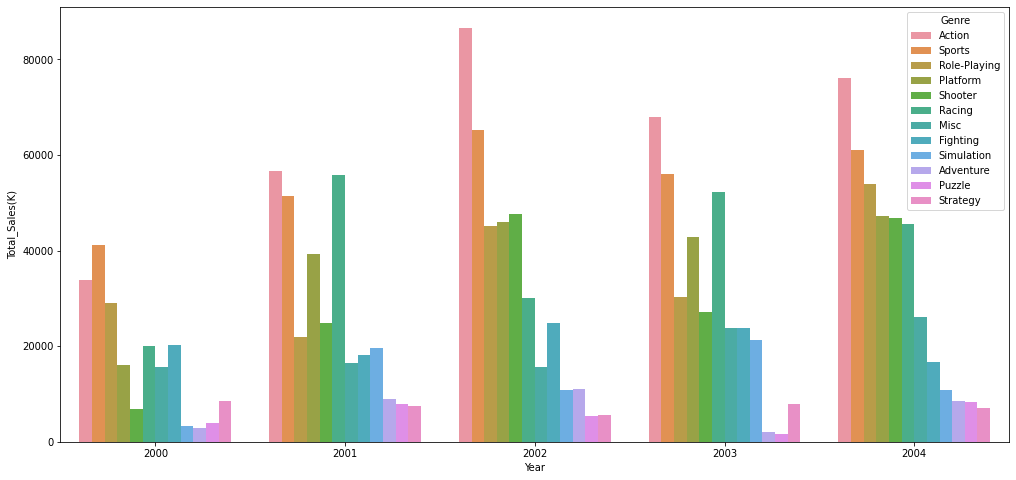

In [57]:
plt.figure(figsize = (17,8))
sns.barplot(data = df_sort_y_g[(df_sort_y_g['Year']>=2000) & (df_sort_y_g['Year']<2005)], x = 'Year', y = 'Total_Sales(K)', hue = 'Genre')

In [58]:
df_new[(df_new['Year'] == 2000)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
2433,Pokémon Crystal Version,GB,2000,Role-Playing,Nintendo,2550.0,1560.0,1290.0,990.0,6390.0
3589,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1620.0,770.0,2780.0,140.0,5310.0
8779,Driver 2,PS,2000,Action,Atari,2360.0,2100.0,20.0,250.0,4730.0
7365,Tony Hawk's Pro Skater 2,PS,2000,Sports,Activision,3050.0,1410.0,20.0,200.0,4680.0
163,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,200.0,140.0,4100.0,20.0,4460.0
2797,Tekken Tag Tournament,PS2,2000,Fighting,Namco Bandai Games,1680.0,1510.0,510.0,350.0,4050.0
8857,Spyro: Year of the Dragon,PS,2000,Platform,Sony Computer Entertainment,1930.0,1580.0,0.0,190.0,3700.0
5024,WWF SmackDown!,PS,2000,Fighting,THQ,2010.0,1350.0,60.0,160.0,3580.0
6032,Rugrats in Paris: The Movie,PS,2000,Action,THQ,1960.0,1330.0,0.0,230.0,3520.0
16479,Crash Bash,PS,2000,Misc,Sony Computer Entertainment,1560.0,1470.0,190.0,170.0,3390.0


- 2000년에는 Sports, Action, Role-Playing 순으로 인기가 있었다.
- 하지만 개별 매출 1, 2위는 Nintendo 사의 Pokemon 시리즈와 SquareSoft 사의 Final Fantasy 시리즈가 각각 차지하며 Role-Playing 장르의 인기를 유지했다.

In [59]:
df_new[(df_new['Year'] == 2000) & (df_new['Genre'] == 'Sports')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
7365,Tony Hawk's Pro Skater 2,PS,2000,Sports,Activision,3050.0,1410.0,20.0,200.0,4680.0
15812,Mario Tennis,N64,2000,Sports,Nintendo,780.0,400.0,1060.0,70.0,2310.0
10566,Tony Hawk's Pro Skater,N64,2000,Sports,Activision,1680.0,400.0,0.0,30.0,2110.0
7745,Madden NFL 2001,PS,2000,Sports,Electronic Arts,1580.0,50.0,0.0,40.0,1670.0
9236,SSX,PS2,2000,Sports,Electronic Arts,780.0,610.0,60.0,200.0,1650.0


In [60]:
df_new[(df_new['Year'] == 2000) & (df_new['Genre'] == 'Action')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
8779,Driver 2,PS,2000,Action,Atari,2360.0,2100.0,20.0,250.0,4730.0
6032,Rugrats in Paris: The Movie,PS,2000,Action,THQ,1960.0,1330.0,0.0,230.0,3520.0
5047,The Legend of Zelda: Majora's Mask,N64,2000,Action,Nintendo,1900.0,670.0,730.0,60.0,3360.0
13474,Spider-Man,PS,2000,Action,Activision,1700.0,1250.0,20.0,160.0,3130.0
7083,Perfect Dark,N64,2000,Action,Nintendo,1550.0,750.0,160.0,60.0,2520.0


- Sports와 Action 장르 둘 다 여러 종류의 게임이 비슷한 수준의 성과를 내며 각 장르별 매출액의 순위를 높였다.
- 하지만 최고 매출 게임은 나오지 못했다.

In [61]:
df_new[(df_new['Year'] == 2001)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
1005,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6850.0,5090.0,1870.0,1160.0,14970.0
9786,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6990.0,4510.0,300.0,1300.0,13100.0
1872,Final Fantasy X,PS2,2001,Role-Playing,Sony Computer Entertainment,2910.0,2070.0,2730.0,330.0,8040.0
10159,Super Smash Bros. Melee,GC,2001,Fighting,Nintendo,4410.0,1040.0,1390.0,220.0,7060.0
10300,Halo: Combat Evolved,XB,2001,Shooter,Microsoft Game Studios,4980.0,1300.0,80.0,70.0,6430.0
8299,Metal Gear Solid 2: Sons of Liberty,PS2,2001,Action,Konami Digital Entertainment,2450.0,2010.0,870.0,720.0,6050.0
1311,Super Mario Advance,GBA,2001,Platform,Nintendo,3140.0,1240.0,910.0,200.0,5490.0
15508,Mario Kart: Super Circuit,GBA,2001,Racing,Nintendo,2620.0,1640.0,990.0,230.0,5480.0
14424,Super Mario World,GBA,2001,Platform,Nintendo,3210.0,1110.0,950.0,200.0,5470.0
10155,Crash Bandicoot: The Wrath of Cortex,PS2,2001,Platform,Universal Interactive,2070.0,2290.0,240.0,820.0,5420.0


- 2001년에는 Take-Two Interactive 사의 GTA3가 흥행하며 다른 Action 장르의 게임들과 함께 Action 장르가 최고 인기를 얻기 시작했다.
- Racing 장르도 Sony 사의 Gran Turismo 3가 매출 1위를 기록하며 Nintendo 사의 Mario Kart와 함께 Racing 장르의 인기를 높였다.
- Nintendo 사의 Mario 세계관 Platform 장르의 게임들도 준수한 성적을 거두었다.

In [62]:
df_new[(df_new['Year'] == 2001) & (df_new['Genre'] == 'Sports')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
7499,Tony Hawk's Pro Skater 3,PS2,2001,Sports,Activision,2660.0,1290.0,10.0,460.0,4420.0
2009,Madden NFL 2002,PS2,2001,Sports,Electronic Arts,2500.0,160.0,10.0,420.0,3090.0
9430,Hot Shots Golf 3,PS2,2001,Sports,Sony Computer Entertainment,990.0,320.0,1380.0,200.0,2890.0
3897,NBA Street,PS2,2001,Sports,Electronic Arts,2190.0,220.0,0.0,380.0,2790.0
13642,NBA Live 2002,PS2,2001,Sports,Electronic Arts,910.0,710.0,0.0,240.0,1860.0


- 2001년에도 역시 스포츠 장르가 3위의 매출을 기록했지만 개별 게임으로는 순위권에 안착하지 못했다.

In [63]:
df_new[(df_new['Year'] == 2002)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
5340,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8410.0,5490.0,470.0,1780.0,16150.0
10917,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6060.0,3900.0,5380.0,500.0,15840.0
6305,Medal of Honor: Frontline,PS2,2002,Shooter,Electronic Arts,2930.0,2750.0,170.0,990.0,6840.0
4601,Kingdom Hearts,PS2,2002,Role-Playing,Sony Computer Entertainment,3640.0,1200.0,1490.0,70.0,6400.0
12863,Super Mario Sunshine,GC,2002,Platform,Nintendo,4010.0,1260.0,870.0,170.0,6310.0
10100,The Lord of the Rings: The Two Towers,PS2,2002,Action,Electronic Arts,1940.0,1950.0,80.0,700.0,4670.0
3151,The Legend of Zelda: The Wind Waker,GC,2002,Action,Nintendo,2600.0,990.0,890.0,130.0,4610.0
10971,Spider-Man: The Movie,PS2,2002,Action,Activision,2710.0,1510.0,30.0,230.0,4480.0
15184,Madden NFL 2003,PS2,2002,Sports,Electronic Arts,3360.0,210.0,10.0,560.0,4140.0
5393,The Sims: Unleashed,PC,2002,Simulation,Electronic Arts,2030.0,1560.0,0.0,170.0,3760.0


- Take-Two 사의 새로운 GTA 시리즈가 Nintendo 사의 Pokemon 시리즈를 누르고 매출 1위를 달성하며 Action 장르가 최고의 인기를 이어나갔다.
- 매출 2위 장르는 Sports 였지만, 이번에도 개별 게임 중 뛰어난 성과를 보인 것은 없었다.
- 그 아래 3개의 장르들은 비슷한 인기를 유지했다.

In [64]:
df_new[(df_new['Year'] == 2003)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
6528,Need for Speed Underground,PS2,2003,Racing,Electronic Arts,3270.0,2830.0,80.0,1020.0,7200.0
8002,Mario Kart: Double Dash!!,GC,2003,Racing,Nintendo,4120.0,1770.0,870.0,190.0,6950.0
6576,Final Fantasy X-2,PS2,2003,Role-Playing,Electronic Arts,1920.0,1080.0,2110.0,170.0,5280.0
9829,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930.0,1250.0,830.0,200.0,5210.0
11521,Medal of Honor: Rising Sun,PS2,2003,Shooter,Electronic Arts,1980.0,2230.0,130.0,800.0,5140.0
2214,The Simpsons: Hit & Run,PS2,2003,Racing,Vivendi Games,1730.0,2190.0,0.0,790.0,4710.0
6569,EyeToy Play,PS2,2003,Misc,Sony Computer Entertainment,880.0,2300.0,200.0,830.0,4210.0
11904,Tony Hawk's Underground,PS2,2003,Sports,Activision,2290.0,1170.0,10.0,420.0,3890.0
3995,The Lord of the Rings: The Return of the King,PS2,2003,Action,Electronic Arts,1500.0,1280.0,50.0,460.0,3290.0
16159,True Crime: Streets of LA,PS2,2003,Action,Activision,1890.0,1050.0,20.0,310.0,3270.0


- 2003년에도 Action 장르의 인기가 가장 높았지만, 매출이 뛰어난 게임은 없었다.
- Sports 장르도 인기는 높았지만 높은 매출을 기록한 게임은 없었다.
- Racing 장르에서 Electronic Arts 사의 Need for Speed 시리즈와 Nintendo 사의 Mario Kart 시리즈가 새로 출시되었고, 각각 매출 1, 2위를 기록하며 Racing 장르의 인기를 다시 높였다.

In [65]:
df_new[(df_new['Year'] == 2003) & (df_new['Genre'] == 'Action')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
3995,The Lord of the Rings: The Return of the King,PS2,2003,Action,Electronic Arts,1500.0,1280.0,50.0,460.0,3290.0
16159,True Crime: Streets of LA,PS2,2003,Action,Activision,1890.0,1050.0,20.0,310.0,3270.0
12811,Enter the Matrix,PS2,2003,Action,Atari,1780.0,1120.0,90.0,190.0,3180.0
8481,Finding Nemo,GBA,2003,Action,THQ,1590.0,1050.0,40.0,140.0,2820.0
11640,Tom Clancy's Splinter Cell,PS2,2003,Action,Ubisoft,1150.0,1110.0,0.0,400.0,2660.0


In [66]:
df_new[(df_new['Year'] == 2003) & (df_new['Genre'] == 'Sports')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
11904,Tony Hawk's Underground,PS2,2003,Sports,Activision,2290.0,1170.0,10.0,420.0,3890.0
6292,World Soccer Winning Eleven 7 International,PS2,2003,Sports,Konami Digital Entertainment,80.0,1240.0,1130.0,450.0,2900.0
16109,NBA Live 2004,PS2,2003,Sports,Electronic Arts,1570.0,180.0,0.0,270.0,2020.0
6992,NBA Street Vol. 2,PS2,2003,Sports,Electronic Arts,1690.0,200.0,0.0,60.0,1950.0
10981,NCAA Football 2004,PS2,2003,Sports,Electronic Arts,1350.0,90.0,0.0,230.0,1670.0


In [67]:
df_new[(df_new['Year'] == 2004)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9430.0,400.0,410.0,10570.0,20810.0
14665,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3010.0,10.0,1100.0,7530.0,11650.0
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4340.0,2650.0,3150.0,350.0,10490.0
12472,Super Mario 64,DS,2004,Platform,Nintendo,5080.0,3110.0,1250.0,980.0,10420.0
9495,Halo 2,XB,2004,Shooter,Microsoft Game Studios,6820.0,1530.0,50.0,80.0,8480.0
4923,Need for Speed Underground 2,PS2,2004,Racing,Electronic Arts,2710.0,3020.0,80.0,1090.0,6900.0
8629,Pokémon Emerald Version,GBA,2004,Role-Playing,Nintendo,2570.0,1580.0,2060.0,210.0,6420.0
5915,World of Warcraft,PC,2004,Role-Playing,Activision,70.0,6210.0,0.0,0.0,6280.0
14746,Dragon Quest VIII: Journey of the Cursed King,PS2,2004,Role-Playing,Square Enix,650.0,750.0,3610.0,200.0,5210.0
16591,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4180.0,260.0,10.0,80.0,4530.0


- 2004년에는 Take-Two Interactive사의 GTA 시리즈가 흥행에 성공하며 Action 장르의 최고 인기를 유지해갔다.
- Sports 장르는 이번에도 높은 흥행에 성공한 게임은 없었다.
- Nintendo 사의 Pokemon 시리즈와 World of Warcraft, Dragon Quest 등이 좋은 성적을 내며 Role-Playing 장르의 인기를 인기를 다시 높였다.
- 이와 별개로, Gran Turismo 4또한 흥행에 성공하며 Need for Speed 시리즈와 함께 순위권에 들었다.

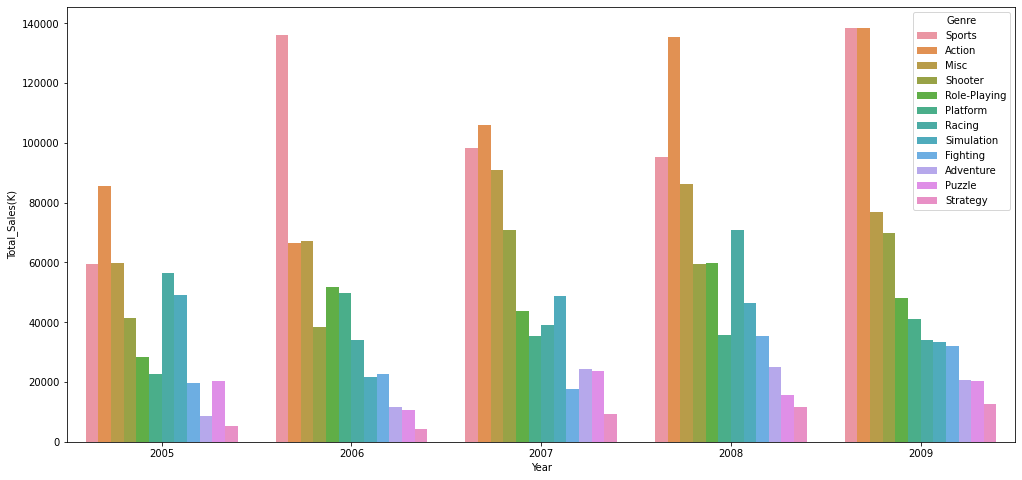

In [68]:
plt.figure(figsize = (17,8))
sns.barplot(data = df_sort_y_g[(df_sort_y_g['Year']>=2005) & (df_sort_y_g['Year']<2010)], x = 'Year', y = 'Total_Sales(K)', hue = 'Genre')

In [69]:
df_new[(df_new['Year'] == 2005)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
11137,Nintendogs,DS,2005,Simulation,Nintendo,9070.0,11000.0,1930.0,2750.0,24750.0
10650,Mario Kart DS,DS,2005,Racing,Nintendo,9810.0,7570.0,4130.0,1920.0,23430.0
13229,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4750.0,9260.0,4160.0,2050.0,20220.0
511,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3440.0,5360.0,5320.0,1180.0,15300.0
3273,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2550.0,3520.0,5330.0,880.0,12280.0
761,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2900.0,2830.0,240.0,1750.0,7720.0
6432,Big Brain Academy,DS,2005,Misc,Nintendo,1670.0,2780.0,1600.0,620.0,6670.0
5189,Madden NFL 06,PS2,2005,Sports,Electronic Arts,3980.0,260.0,10.0,660.0,4910.0
4621,God of War,PS2,2005,Action,Sony Computer Entertainment,2710.0,1290.0,20.0,430.0,4450.0
11335,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2030.0,1790.0,80.0,470.0,4370.0


- 2005년에는 Action, misc, Sports 장르 순으로 인기가 많았다.
- Nintendo 사에서 새로운 장르의 게임들을 많이 출시했는데 매출 1~5등과 7등을 차지했다.
- 그와 동시에 Misc 장르를 인기 순위 2등으로 만들었다.
- Simulation 장르는 3등 안에는 들지 못했지만 개별 매출이 1위와 5위를 차지했다.
- Sports 장르는 전과 비슷했다.


In [70]:
df_new[(df_new['Year'] == 2005) & (df_new['Genre'] == 'Action')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
761,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2900.0,2830.0,240.0,1750.0,7720.0
4621,God of War,PS2,2005,Action,Sony Computer Entertainment,2710.0,1290.0,20.0,430.0,4450.0
4247,Resident Evil 4,PS2,2005,Action,Capcom,2080.0,830.0,460.0,250.0,3620.0
1602,LEGO Star Wars: The Video Game,PS2,2005,Action,Eidos Interactive,1980.0,1140.0,10.0,410.0,3540.0
9007,Star Wars Episode III: Revenge of the Sith,PS2,2005,Action,LucasArts,1470.0,1390.0,30.0,430.0,3320.0


- Take-Two Interactive 사의 GTA 시리즈와 Sony 사의 God of war 도 순위권에 들며 준수한 성적을 냈고, Action 장르가 인기 1위를 차지했다.

In [71]:
df_new[(df_new['Year'] == 2006)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
2908,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380.0,9230.0,6500.0,2900.0,30010.0
3014,Wii Play,Wii,2006,Misc,Nintendo,14030.0,9200.0,2930.0,2850.0,29010.0
10555,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6420.0,4520.0,6040.0,1370.0,18350.0
1035,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3830.0,2190.0,600.0,700.0,7320.0
14197,Gears of War,X360,2006,Shooter,Microsoft Game Studios,3540.0,1900.0,70.0,600.0,6110.0
9666,Cooking Mama,DS,2006,Simulation,505 Games,3130.0,1940.0,70.0,580.0,5720.0
10592,Guitar Hero II,PS2,2006,Misc,RedOctane,3810.0,630.0,0.0,680.0,5120.0
6606,Grand Theft Auto: Vice City Stories,PSP,2006,Action,Take-Two Interactive,1700.0,2020.0,160.0,1210.0,5090.0
14918,Madden NFL 07,PS2,2006,Sports,Electronic Arts,3630.0,240.0,10.0,610.0,4490.0


- 스미액
- 2006년에는 Nintendo에서 출시한 새로운 플랫폼 Wii가 많은 인기를 얻으며 Wii Sports, Wii Play, The Legend of Zelda 등 WII 게임들이 폭발적인 인기를 얻었다.
- 특히 Wii Sports는 엄청난 인기를 얻으며 Sports 장르를 압도적인 1위로 만드는데 기여했다.
- Nintendo는 DS에서 플레이 가능한 다른 장르의 게임들도 흥행에 성공하며 이번에도 매출 1~5위를 모두 가져갔다.

In [72]:
df_new[(df_new['Year'] == 2006) & (df_new['Genre'] == 'Sports')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
2908,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
14918,Madden NFL 07,PS2,2006,Sports,Electronic Arts,3630.0,240.0,10.0,610.0,4490.0
13026,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006,Sports,Konami Digital Entertainment,100.0,2390.0,1050.0,860.0,4400.0
15591,FIFA Soccer 07,PS2,2006,Sports,Electronic Arts,710.0,2480.0,30.0,890.0,4110.0
2949,Madden NFL 07,X360,2006,Sports,Electronic Arts,1660.0,0.0,10.0,130.0,1800.0


In [73]:
df_new[(df_new['Year'] == 2006) & (df_new['Genre'] == 'Misc')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
3014,Wii Play,Wii,2006,Misc,Nintendo,14030.0,9200.0,2930.0,2850.0,29010.0
10592,Guitar Hero II,PS2,2006,Misc,RedOctane,3810.0,630.0,0.0,680.0,5120.0
9867,Clubhouse Games,DS,2006,Misc,Nintendo,590.0,1830.0,730.0,350.0,3500.0
9508,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,Nintendo,0.0,990.0,2320.0,20.0,3330.0
14352,Personal Trainer: Cooking,DS,2006,Misc,Nintendo,910.0,1000.0,1030.0,170.0,3110.0


In [74]:
df_new[(df_new['Year'] == 2006) & (df_new['Genre'] == 'Action')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
1035,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3830.0,2190.0,600.0,700.0,7320.0
6606,Grand Theft Auto: Vice City Stories,PSP,2006,Action,Take-Two Interactive,1700.0,2020.0,160.0,1210.0,5090.0
5318,Grand Theft Auto: Liberty City Stories,PS2,2006,Action,Take-Two Interactive,1560.0,1400.0,70.0,500.0,3530.0
1364,LEGO Star Wars II: The Original Trilogy,PS2,2006,Action,LucasArts,1850.0,640.0,10.0,190.0,2690.0
8269,Hannah Montana,DS,2006,Action,Disney Interactive Studios,1590.0,800.0,0.0,260.0,2650.0


In [75]:
df_new[(df_new['Year'] == 2007)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
3435,Wii Fit,Wii,2007,Sports,Nintendo,8940.0,8030.0,3600.0,2150.0,22720.0
6291,Halo 3,X360,2007,Shooter,Microsoft Game Studios,7970.0,2830.0,130.0,1210.0,12140.0
12405,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6160.0,3400.0,1200.0,760.0,11520.0
122,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5910.0,2380.0,130.0,900.0,9320.0
7701,Mario Party DS,DS,2007,Misc,Nintendo,4460.0,1880.0,1980.0,700.0,9020.0
15265,Mario Party 8,Wii,2007,Misc,Nintendo,3810.0,2300.0,1580.0,730.0,8420.0
8482,Mario & Sonic at the Olympic Games,Wii,2007,Sports,Sega,2580.0,3900.0,660.0,910.0,8050.0
4226,Call of Duty 4: Modern Warfare,PS3,2007,Shooter,Activision,3100.0,2300.0,280.0,1040.0,6720.0
7943,LEGO Star Wars: The Complete Saga,Wii,2007,Action,LucasArts,3660.0,1630.0,0.0,530.0,5820.0
10707,Assassin's Creed,X360,2007,Adventure,Ubisoft,3280.0,1650.0,70.0,550.0,5550.0


- 2007년의 인기는 Action 장르가 가장 높았지만 개별 매출이 높진 않았다.
- Nintendo 사의 Wii Fit가 압도적 1위를 기록하며 다시 한 번 Sports 장르의 인기를 높였다.
- Sega 사의 Mario& Sonic과 Nintendo 사의 Mario Party 시리즈는 마리오 캐릭터의 인기를 활용하여 Sports와 Misc 장르의 인기를 높이는 데 일조했다.

In [76]:
df_new[(df_new['Year'] == 2008)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
14902,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6750.0,2610.0,2660.0,1020.0,13040.0
13926,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6760.0,3100.0,140.0,1030.0,11030.0
16475,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4760.0,3760.0,440.0,1620.0,10580.0
7631,Pokémon Platinum Version,DS,2008,Role-Playing,Nintendo,2820.0,1780.0,2690.0,550.0,7840.0
10937,Call of Duty: World at War,X360,2008,Shooter,Activision,4790.0,1900.0,0.0,690.0,7380.0
7584,Gears of War 2,X360,2008,Shooter,Microsoft Game Studios,4150.0,1920.0,60.0,640.0,6770.0
11080,Metal Gear Solid 4: Guns of the Patriots,PS3,2008,Action,Konami Digital Entertainment,2630.0,1740.0,830.0,830.0,6030.0
9075,LittleBigPlanet,PS3,2008,Platform,Sony Computer Entertainment,2800.0,2050.0,170.0,900.0,5920.0
4534,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,470.0,570.0,4130.0,340.0,5510.0


- 2008년에는 Nintendo 사가 Mario Kart와 Super Smash Bros 시리즈를 Wii 버전으로 출시했고 모두 흥행에 성공했다.
- 하지만 Take-Two Interactive 사의 GTA IV역시 흥행에 성공하며 기존의 Action 장르들의 단단한 지지층에 더해 Action 장르를 다시 매출 1순위로 바꿨다.
- 이번에도 흥미로운 점은 Sports 장르와 Misc 높은 매출을 낸 게임은 없지만 총 매출 2위를 기록했다.

In [77]:
df_new[(df_new['Year'] == 2008) & (df_new['Genre'] == 'Sports')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
384,Mario & Sonic at the Olympic Games,DS,2008,Sports,Sega,1640.0,2480.0,440.0,580.0,5140.0
15558,Sega Superstars Tennis,X360,2008,Sports,Sega,1750.0,860.0,0.0,280.0,2890.0
1705,FIFA Soccer 09,PS3,2008,Sports,Electronic Arts,480.0,1630.0,40.0,430.0,2580.0
1046,Deca Sports,Wii,2008,Sports,Konami Digital Entertainment,1130.0,870.0,290.0,250.0,2540.0
15007,Madden NFL 09,X360,2008,Sports,Electronic Arts,2210.0,120.0,0.0,200.0,2530.0


In [78]:
df_new[(df_new['Year'] == 2008) & (df_new['Genre'] == 'Misc')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
12808,Guitar Hero: World Tour,Wii,2008,Misc,Activision,2330.0,970.0,0.0,350.0,3650.0
6114,Guitar Hero: On Tour,DS,2008,Misc,Activision,2110.0,1010.0,10.0,350.0,3480.0
14053,Wii Music,Wii,2008,Misc,Nintendo,1360.0,1130.0,460.0,320.0,3270.0
11609,Rhythm Heaven,DS,2008,Misc,Nintendo,580.0,510.0,1930.0,140.0,3160.0
5565,Guitar Hero: World Tour,X360,2008,Misc,Activision,1780.0,640.0,0.0,250.0,2670.0


In [79]:
df_new[(df_new['Year'] == 2009)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590.0,7060.0,4700.0,2260.0,28610.0
10899,Wii Fit Plus,Wii,2009,Sports,Nintendo,9090.0,8590.0,2530.0,1790.0,22000.0
6236,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8520.0,3630.0,80.0,1290.0,13520.0
4806,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4400.0,2770.0,3960.0,770.0,11900.0
8374,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4990.0,3690.0,380.0,1630.0,10690.0
5437,The Sims 3,PC,2009,Simulation,Electronic Arts,980.0,6420.0,0.0,710.0,8110.0
11299,Just Dance,Wii,2009,Misc,Ubisoft,3510.0,3030.0,0.0,730.0,7270.0
13552,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3270.0,2250.0,210.0,1000.0,6730.0
6562,Halo 3: ODST,X360,2009,Shooter,Microsoft Game Studios,4340.0,1350.0,60.0,610.0,6360.0


- 2009년에는 Nintendo 사의 Wii Sports와 Wii Fit 시리즈가 매출 1위와 3위를 기록하며 Sports 장르의 인기를 다시 1위로 이끌어냈다.
- 또한 Nintendo 사의 Pokemon 시리즈가 새로 나오며 Action 장르의 인기를 이어나갔다.
- Misc 장르는 Ubisoft의 Just Dance가 Wii에 출시되었고 다른 게임들과 함께 준수한 성적으로 인기를 유지했다.

In [80]:
df_new[(df_new['Year'] == 2009) & (df_new['Genre'] == 'Misc')].sort_values('Total_Sales(K)', ascending = False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
11299,Just Dance,Wii,2009,Misc,Ubisoft,3510.0,3030.0,0.0,730.0,7270.0
8212,Friend Collection,DS,2009,Misc,Nintendo,0.0,0.0,3670.0,0.0,3670.0
14415,Sonic's Ultimate Genesis Collection,PS3,2009,Misc,Sega,1340.0,620.0,0.0,310.0,2270.0
9962,Wipeout: The Game,Wii,2009,Misc,Mindscape,1970.0,0.0,0.0,120.0,2090.0
1426,Toy Story Mania!,Wii,2009,Misc,Disney Interactive Studios,1060.0,670.0,0.0,180.0,1910.0


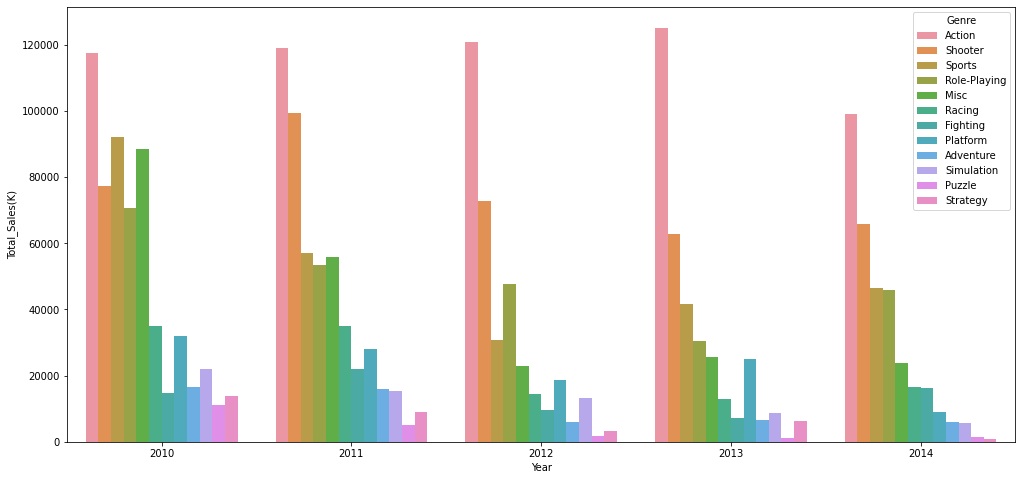

In [81]:
plt.figure(figsize = (17,8))
sns.barplot(data = df_sort_y_g[(df_sort_y_g['Year']>=2010) & (df_sort_y_g['Year']<2015)], x = 'Year', y = 'Total_Sales(K)', hue = 'Genre')

In [82]:
df_new[(df_new['Year'] == 2010)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14970.0,4940.0,240.0,1670.0,21820.0
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5570.0,3280.0,5650.0,820.0,15320.0
6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9670.0,3730.0,110.0,1130.0,14640.0
9924,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5980.0,4440.0,480.0,1830.0,12730.0
6216,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2960.0,4880.0,810.0,2120.0,10770.0
12600,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030.0,1980.0,80.0,780.0,9870.0
9230,Just Dance 2,Wii,2010,Misc,Ubisoft,5840.0,2890.0,10.0,780.0,9520.0
16515,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3660.0,2420.0,980.0,640.0,7700.0
14786,Zumba Fitness,Wii,2010,Sports,505 Games,3500.0,2640.0,0.0,670.0,6810.0
16276,Red Dead Redemption,PS3,2010,Action,Take-Two Interactive,2790.0,2610.0,170.0,1030.0,6600.0


- 2010년에는 Action 장르가 매출 1위를 했지만 개별 매출로 보면 10위 권에 한 개의 게임밖에 없다.
- Sports 장르 또한 Zumba Fitness 하나만 있지만 인기 2위를 기록했다.
- Misc 장르의 경우 Microsoft Game Studios 사의 Kinect Adventures!가 흥행에 성공했고, Ubisoft 사의 Just Dance 2 또한 좋은 성적을 얻으며 Misc 장르의 인기를 유지했다.

In [83]:
df_new[(df_new['Year'] == 2011)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030.0,4280.0,130.0,1320.0,14760.0
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540.0,5820.0,490.0,1620.0,13470.0
11123,Mario Kart 7,3DS,2011,Racing,Nintendo,4740.0,3910.0,2670.0,890.0,12210.0
12623,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4890.0,2990.0,2130.0,780.0,10790.0
223,Just Dance 3,Wii,2011,Misc,Ubisoft,6050.0,3150.0,0.0,1070.0,10270.0
11519,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,5030.0,2860.0,100.0,850.0,8840.0
8010,Battlefield 3,X360,2011,Shooter,Electronic Arts,4460.0,2130.0,60.0,690.0,7340.0
9452,Battlefield 3,PS3,2011,Shooter,Electronic Arts,2850.0,2930.0,350.0,1100.0,7230.0
11868,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2770.0,2800.0,190.0,1060.0,6820.0
13489,FIFA 12,PS3,2011,Sports,Electronic Arts,840.0,4320.0,110.0,1420.0,6690.0


- 액션 슈터 스포츠
- 2011년에는 Activision 사의 Call of Duty 시리즈가 흥행에 성공하며 Shooter 장르의 인기를 2위까지 높였다.
- 크게 흥행에 성공한 게임은 없지만 Action 장르의 인기는 여전히 높았다.
- 또한 Electronic Arts 사의 Battlefield 시리즈도 준수한 성적을 내며 Shooter 장르의 인기에 기여했다.
- 이와 별개로, Nintendo 사의 Mario Kart와 Super Mario 시리즈는 우수한 성적을 냈다.

In [84]:
df_new[(df_new['Year'] == 2012)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990.0,5880.0,650.0,2520.0,14040.0
6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250.0,4300.0,70.0,1120.0,13740.0
10379,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,3660.0,3070.0,2470.0,630.0,9830.0
14576,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6630.0,2360.0,40.0,730.0,9760.0
8906,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2010.0,2320.0,4360.0,410.0,9100.0
15678,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2910.0,1860.0,3140.0,430.0,8340.0
9035,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1060.0,5050.0,130.0,2010.0,8250.0
6552,Just Dance 4,Wii,2012,Misc,Ubisoft,4140.0,2210.0,0.0,560.0,6910.0
1629,Assassin's Creed III,PS3,2012,Action,Ubisoft,2640.0,2560.0,160.0,1140.0,6500.0
15639,Assassin's Creed III,X360,2012,Action,Ubisoft,3130.0,1710.0,30.0,440.0,5310.0


- 액션 슈터 롤플레잉
- 2012년에는 Activision 사의 Call of Duty 시리즈가 또 다시 흥행에 성공하며 Shooter 장르의 인기를 유지했다.
- Action 장르에서도 Ubisoft의 Assassin's Creed 시리즈 등 개별 매출 10위 안에 드는 게임이 3개나 되었고 장르 인기도 최고였다.


In [85]:
df_new[(df_new['Year'] == 2013)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010.0,9270.0,970.0,4140.0,21390.0
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630.0,5310.0,60.0,1380.0,16380.0
5604,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6720.0,2630.0,40.0,820.0,10210.0
6881,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,4090.0,3730.0,380.0,1380.0,9580.0
9994,Minecraft,X360,2013,Misc,Microsoft Game Studios,5580.0,2830.0,20.0,770.0,9200.0
2723,FIFA 14,PS3,2013,Sports,Electronic Arts,780.0,4320.0,70.0,1730.0,6900.0
8082,The Last of Us,PS3,2013,Action,Sony Computer Entertainment Europe,2410.0,2280.0,280.0,1010.0,5980.0
15181,Tomodachi Life,3DS,2013,Simulation,Nintendo,960.0,2020.0,1890.0,280.0,5150.0
2028,Luigi's Mansion: Dark Moon,3DS,2013,Action,Nintendo,1780.0,1390.0,1100.0,300.0,4570.0
7865,FIFA 14,X360,2013,Sports,Electronic Arts,920.0,2930.0,10.0,460.0,4320.0


- 액션 슈터 스포츠
- 2013년에는 Take-Two Interactive 사의 GTA 5가 흥행에 성공하며 Action 장르의 인기를 더욱 높였다.
- Activision 사의 Call of Duty 시리즈 또한 흥행에 성공하며 Shooter 장르의 인기를 유지했다.
- Electronic Arts 사의 FIFA 14 시리즈도 순위권에 들며 기존에 있기있던 장르인 Sports의 인기를 더욱 높였다.


In [86]:
df_new[(df_new['Year'] == 2014)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800.0,5810.0,360.0,2020.0,11990.0
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4230.0,3370.0,3080.0,650.0,11330.0
7142,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2800.0,3300.0,140.0,1370.0,7610.0
12850,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3240.0,1350.0,2420.0,430.0,7440.0
4211,Mario Kart 8,WiiU,2014,Racing,Nintendo,3130.0,2070.0,1270.0,490.0,6960.0
3079,FIFA 15,PS4,2014,Sports,Electronic Arts,790.0,4290.0,50.0,1470.0,6600.0
9900,Destiny,PS4,2014,Shooter,Activision,2490.0,2050.0,160.0,960.0,5660.0
16503,Minecraft,PS3,2014,Misc,Sony Computer Entertainment,1970.0,2510.0,0.0,940.0,5420.0
15314,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,3210.0,1530.0,10.0,380.0,5130.0
10834,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2660.0,2010.0,0.0,410.0,5080.0


- 액션 슈터 스포츠 롤플레잉
- 2014년에는 Take-Two Interactive 사의 GTA 5가 PS4 플랫폼에서도 흥행에 성공하며 Action 장르의 인기를 이어나갔다.
- Activision 사의 Shooter 장르 게임도 3개가 개별 매출 순위권에 들며 Shooter 장르의 인기를 이어 나갔다.
- 장르의 순위는 4등이지만 Nintendo 사의 Pokemon 시리즈는 흥행에 성공했다.

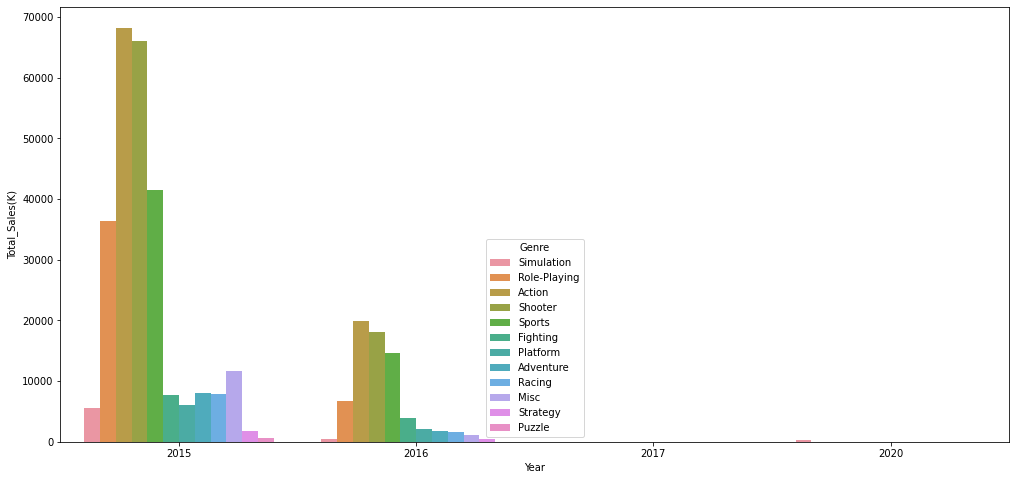

In [87]:
plt.figure(figsize = (17,8))
sns.barplot(data = df_sort_y_g[(df_sort_y_g['Year']>=2015) & (df_sort_y_g['Year']<=2020)], x = 'Year', y = 'Total_Sales(K)', hue = 'Genre')

In [88]:
df_new[(df_new['Year'] == 2015)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770.0,5810.0,350.0,2310.0,14240.0
2639,FIFA 16,PS4,2015,Sports,Electronic Arts,1110.0,6060.0,60.0,1260.0,8490.0
3024,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2930.0,3290.0,220.0,1230.0,7670.0
15981,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4520.0,2090.0,10.0,670.0,7290.0
11292,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2470.0,3150.0,240.0,1100.0,6960.0
5692,Splatoon,WiiU,2015,Shooter,Nintendo,1550.0,1150.0,1440.0,430.0,4570.0
13604,Uncharted: The Nathan Drake Collection,PS4,2015,Action,Sony Computer Entertainment,1960.0,1690.0,80.0,740.0,4470.0
12167,Halo 5: Guardians,XOne,2015,Shooter,Microsoft Game Studios,2640.0,1200.0,30.0,390.0,4260.0
16289,Fallout 4,XOne,2015,Role-Playing,Bethesda Softworks,2450.0,1260.0,10.0,370.0,4090.0
10968,NBA 2K16,PS4,2015,Sports,Take-Two Interactive,2480.0,650.0,30.0,690.0,3850.0


- 액션 슈터 스포츠
- Activision 사의 Call of Duty 시리즈를 비롯해 다양한 Shooter 장르들이 좋은 서적을 냈고, Shooter 장르의 인기를 유지했다.
- Action 장르에서는 특별히 뛰어난 게임은 없었지만 매출 1위를 기록했다.
- Sports에서는 FIFA16과 NBA 게임이 좋은 성적을 냈다.

In [89]:
df_new[(df_new['Year'] == 2015) & (df_new['Genre'] == 'Action')].shape

(253, 10)

In [90]:
df_new[(df_new['Year'] == 2015) & (df_new['Genre'] == 'Shooter')].shape

(34, 10)

In [91]:
df_new[(df_new['Year'] == 2015) & (df_new['Genre'] == 'Sports')].shape

(62, 10)

In [92]:
df_new[(df_new['Year'] == 2016)].sort_values('Total_Sales(K)', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
15481,FIFA 17,PS4,2016,Sports,Electronic Arts,280.0,3750.0,60.0,690.0,4780.0
4010,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1300.0,2070.0,180.0,650.0,4200.0
3297,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1280.0,1610.0,150.0,570.0,3610.0
16439,Far Cry: Primal,PS4,2016,Action,Ubisoft,590.0,1160.0,60.0,330.0,2140.0
11763,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1200.0,620.0,0.0,180.0,2000.0
2870,Overwatch,PS4,2016,Shooter,Activision,640.0,680.0,140.0,260.0,1720.0
8557,No Man's Sky,PS4,2016,Action,Hello Games,580.0,740.0,20.0,260.0,1600.0
13041,Dark Souls III,PS4,2016,Role-Playing,Namco Bandai Games,580.0,440.0,330.0,210.0,1560.0
16337,FIFA 17,XOne,2016,Sports,Electronic Arts,170.0,1260.0,0.0,100.0,1530.0
6897,Doom (2016),PS4,2016,Shooter,Bethesda Softworks,490.0,660.0,20.0,220.0,1390.0


- 액션 슈터 스포츠
- 2016년에는 대체적으로 매출이 줄어들었다.
- Action 장르의 매출은 여전히 많았고, 순위권에는 Shooter 장르의 게임들이 많았다.
- Electronic Arts 사의 FIFA 시리즈가 최고의 매출을 달성했다.

In [93]:
df_new[(df_new['Year'] == 2016) & (df_new['Genre'] == 'Action')].shape

(118, 10)

In [94]:
df_new[(df_new['Year'] == 2016) & (df_new['Genre'] == 'Shooter')].shape

(32, 10)

In [95]:
df_new[(df_new['Year'] == 2016) & (df_new['Genre'] == 'Sports')].shape

(38, 10)

### (필수)매출이 높은 게임에 대한 분석

In [224]:
df_best20 = df_new.sort_values('Total_Sales(K)', ascending = False).head(20)
df_best20['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES'],
      dtype=object)

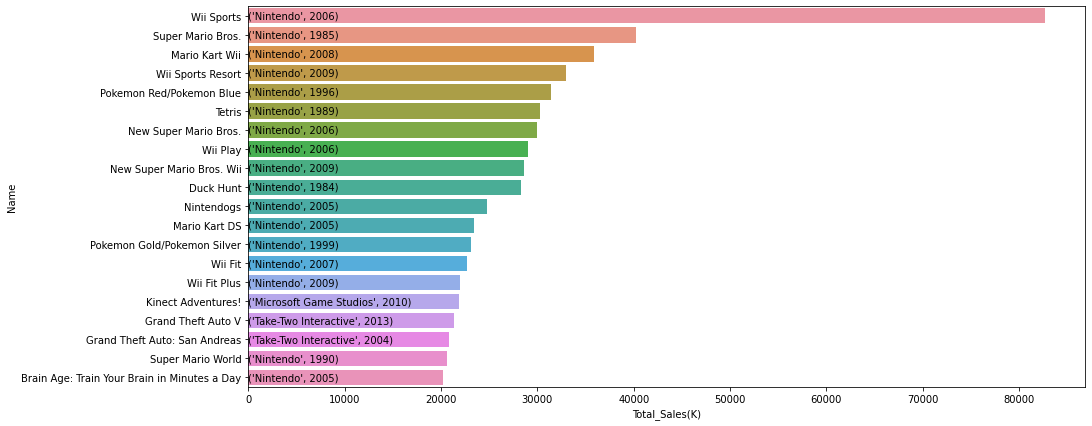

In [162]:
plt.figure(figsize = (15,7))
sns.barplot(data = df_best20, x = 'Total_Sales(K)', y = 'Name')
for i in range(20): 
  plt.annotate((df_best20['Publisher'].tolist()[i], df_best20['Year'].tolist()[i]), xy = [0,i], va = 'center', ha = 'left')


- 가장 매출이 높은 게임은 Nintendo 사의 wii sports다.
- 당시 새로운 플랫폼인 Wii가 사람들에게 혁신으로 다가왔다.
- Wii sports는 센서 기반으로 야구, 탁구 등 실제 스포츠를 집 안에서 즐길 수 있었는데, 원래 Sports 게임에 대한 지지층이 단단했던 NA, EU 지역은 물론, 그동안 저조했던 JP지역까지 잡으면서 엄청난 흥행에 성공했다.

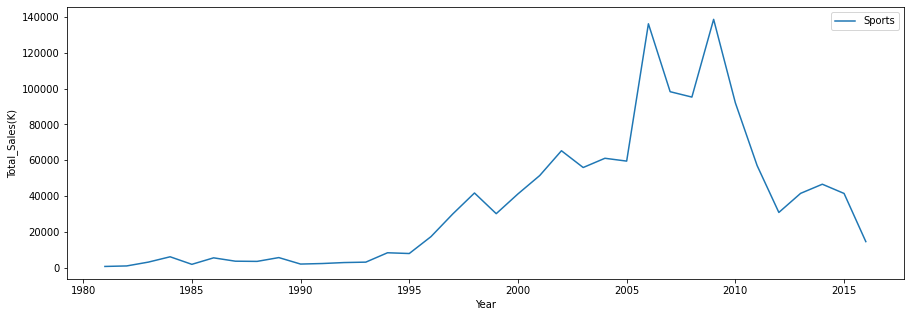

In [164]:
fig, ax = plt.subplots(figsize = (15,5))

ax = sns.lineplot(data = df_sp,  x = 'Year', y = 'Total_Sales(K)')

ax.legend(['Sports'])

- Sports 장르가 1위를 했던 2006년과 2009년에는 각각 Wii sports와 Wii sports resort가 출시됐다.

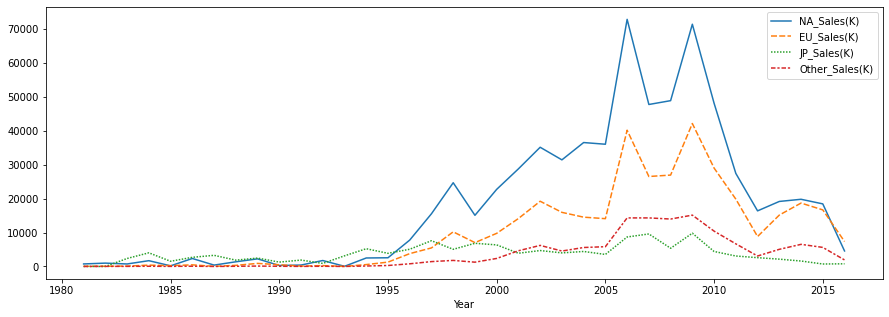

In [175]:
fig, ax = plt.subplots(figsize = (15,5))

ax = sns.lineplot(data = df_sp.drop('Total_Sales(K)',axis = 1).set_index('Year'))

- Sports 장르의 지역별 연도별 변화
- Wii가 출시된 2006년을 기점으로 모든 지역에서 전보다 2~3배의 매출이 나왔다.
- Wii sports resort가 출시된 2009년에 다시 한 번 급등했고 그 이후 줄어들었다.

([<matplotlib.patches.Wedge at 0x7f0771448ba8>,
 [Text(0.7053422663930613, 0.9708204196655013, 'Mario'),
  Text(-0.9801072140121811, 0.4993894763020951, 'Wii'),
  Text(-0.8899186423571203, -0.6465638483438895, 'Pokemon'),
  Text(-0.3399186007611086, -1.0461621981588756, 'GTA'),
  Text(0.777817532129725, -0.7778173864806729, 'Other')],
 [Text(0.41144965539595235, 0.5663119114715424, '30.0%'),
  Text(-0.5346039349157351, 0.27239425980114274, '25.0%'),
  Text(-0.48541016855842917, -0.35267119000575786, '10.0%'),
  Text(-0.1854101458696956, -0.5706339262684775, '10.0%'),
  Text(0.42426410843439544, -0.42426402898945786, '25.0%')])

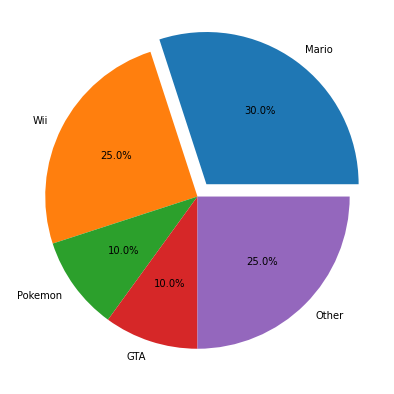

In [219]:
df_mario = pd.DataFrame(np.array([[6, 5, 2, 2, 5]]))
df_mario = df_mario.rename(columns = {0 : 'Mario', 1 : 'Wii', 2 : 'Pokemon', 3 : 'GTA', 4 : 'Other'})
plt.figure(figsize = (7,7))
plt.pie(df_mario, labels = df_mario.columns, autopct='%1.1f%%', explode = [0.1, 0, 0, 0, 0])

([<matplotlib.patches.Wedge at 0x7f0770b9ef28>,
 [Text(0.5447886197087486, 1.0692078188246832, 'Wii'),
  Text(-1.046162158377023, 0.3399187231970734, 'DS'),
  Text(-0.7778174593052025, -0.7778174593052023, 'GB'),
  Text(2.5747357732524542e-08, -1.0999999999999999, 'NES'),
  Text(0.6465638066837904, -0.8899186726249574, 'PS'),
  Text(1.0461621822461364, -0.3399186497354948, 'Other')],
 [Text(0.31779336149676995, 0.6237045609810652, '35.0%'),
  Text(-0.5706339045692852, 0.1854102126529491, '20.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '15.0%'),
  Text(1.4044013308649749e-08, -0.5999999999999999, '10.0%'),
  Text(0.35267116728206743, -0.48541018506815853, '10.0%'),
  Text(0.5706339175888016, -0.18541017258299716, '10.0%')])

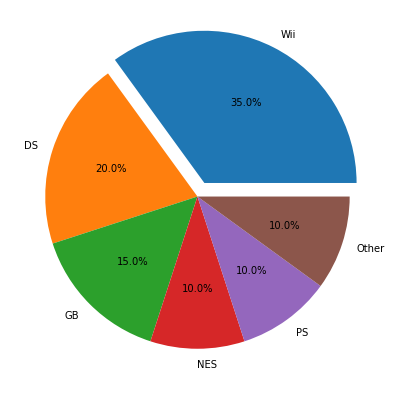

In [233]:
df_mario = pd.DataFrame(np.array([[7, 4, 3, 2, 2, 2]]))
df_mario = df_mario.rename(columns = {0 : 'Wii', 1 : 'DS', 2 : 'GB', 3 : 'NES', 4 : 'PS', 5 : 'Other'})
plt.figure(figsize = (7,7))
plt.pie(df_mario, labels = df_mario.columns, autopct='%1.1f%%', explode = [0.1, 0, 0, 0, 0, 0])

### 3. (가설) 게임의 개수가 매출의 총 합에 영향을 미친다.
- 연도별 분석을 하다보니 가장 매출이 높았던 게임의 장르와 전체 매출 1위의 장르가 달랐다.
- 예를 들어, Sports, Action 장르의 게임은 당해년도 매출 10위 내에 별로 없었지만 전체 매출은 1~2위를 하는 모습이 보인다.
- 그렇다면 출시된 게임의 수가 많을 수록 매출이 늘어난다고 볼 수 있다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

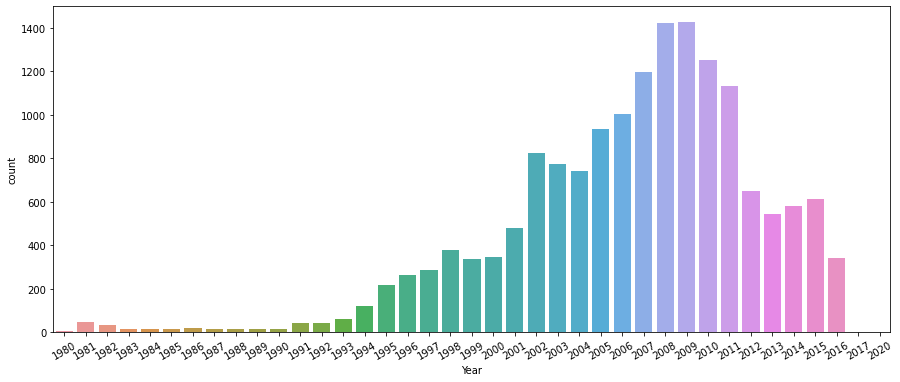

In [220]:
plt.figure(figsize = (15,6))
sns.countplot(data = df_sort_y, x = 'Year')
plt.xticks(rotation = 30)

- 게임의 수는 2008년 이후로 줄어들고 있다.
- 그렇다면 돈은 언제 가장 많이 벌었을까?

In [97]:
df_money_by_y = df_sort_y.groupby('Year')[['NA_Sales(K)', 'EU_Sales(K)', 'JP_Sales(K)', 'Other_Sales(K)', 'Total_Sales(K)']].sum()
df_money_by_y.head()

,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
Year,,,,,
1980,10130.0,640.0,0.0,110.0,10880.0
1981,33400.0,1960.0,0.0,320.0,35680.0
1982,26920.0,1650.0,0.0,310.0,28880.0
1983,7760.0,800.0,8100.0,140.0,16800.0
1984,33280.0,2100.0,14270.0,700.0,50350.0


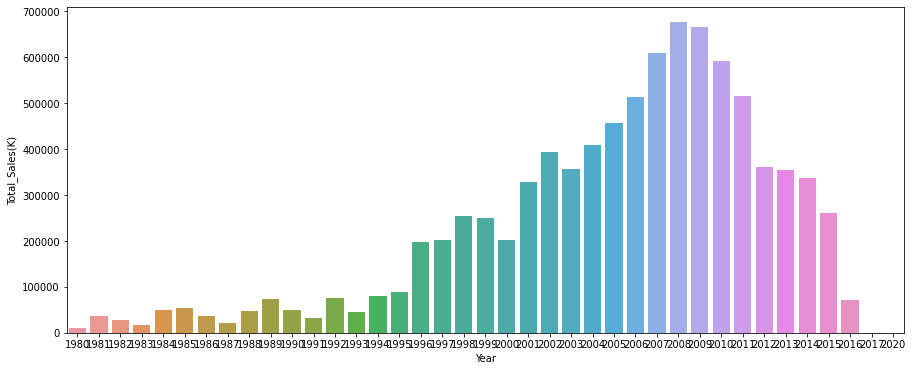

In [98]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_money_by_y.reset_index(), x = 'Year', y = 'Total_Sales(K)')

- 연도별 게임의 수와 매출을 Bar 그래프가 비슷하게 나왔다.
- 그렇다면 게임의 수와 매출이 연관이 있다. (가설)
- 연도와 게임의 수 / 연도와 매출이 연관이 있다. (가설)

In [99]:
df_dum = pd.get_dummies(data = df_new[['Year', 'Genre', 'Total_Sales(K)']])
df_dum.head()

,Year,Total_Sales(K),Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2008,40.0,1,0,0,0,0,0,0,0,0,0,0,0
1,2009,180.0,1,0,0,0,0,0,0,0,0,0,0,0
2,2010,20.0,0,1,0,0,0,0,0,0,0,0,0,0
3,2010,40.0,0,0,0,1,0,0,0,0,0,0,0,0
4,2010,250.0,0,0,0,0,1,0,0,0,0,0,0,0


In [100]:
df_dum_sum = df_dum.groupby('Year').sum()
df_dum_sum['Game_count'] = df_dum_sum.iloc[:,1:].T.sum()
df_dum_sum['Total_mean(K)'] = df_dum_sum['Total_Sales(K)'] / df_dum_sum.iloc[:,1:].T.sum()
df_dum_sum.head()

,Total_Sales(K),Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Game_count,Total_mean(K)
Year,,,,,,,,,,,,,,,
1980,10880.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,680.000000
1981,35680.0,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0,46.0,387.826087
1982,28880.0,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0,36.0,401.111111
1983,16800.0,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17.0,494.117647
1984,50350.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0,14.0,1798.214286


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

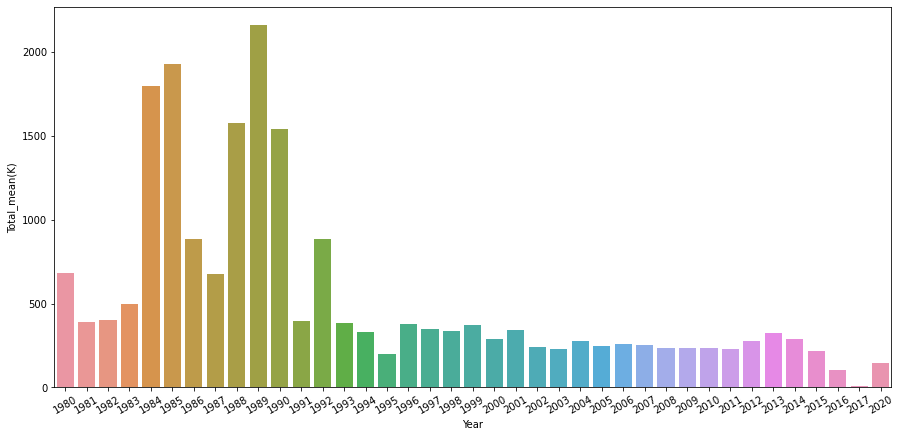

In [101]:
plt.figure(figsize = (15,7))
sns.barplot(data = df_dum_sum.reset_index(), x = 'Year', y = 'Total_mean(K)')
plt.xticks(rotation = 30)

- 연도별 총 매출액을 게임 수로 나눠보니 1993년 이후로 거의 비슷하다.

In [102]:
df_dum_sum[['Total_Sales(K)', 'Game_count']].corr()

,Total_Sales(K),Game_count
Total_Sales(K),1.000000,0.983534
Game_count,0.983534,1.000000


- 게임 개수와 총 매출액의 상관관계를 분석해보니 매우 연관이 있었다.

In [103]:
df_dum_sum[['Total_Sales(K)', 'Game_count']].sort_values('Game_count').reset_index().set_index('Game_count').drop('Year', axis = 1).head()

,Total_Sales(K)
Game_count,
1.0,290.0
3.0,50.0
8.0,10880.0
14.0,50350.0
14.0,53950.0


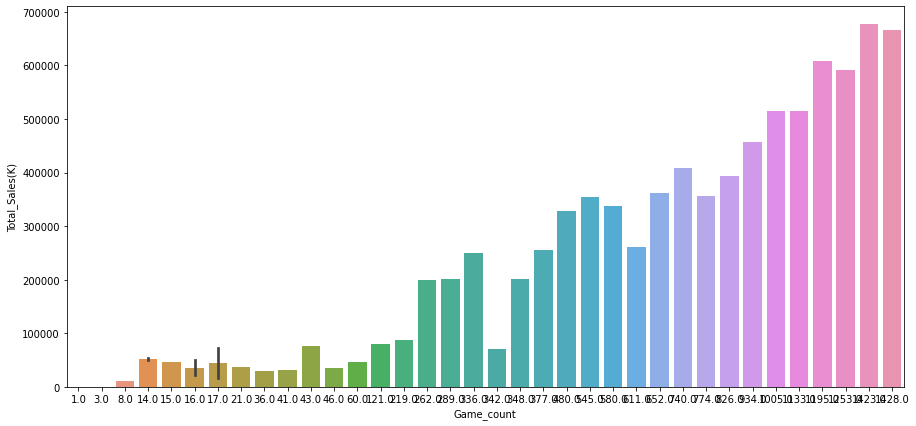

In [104]:
plt.figure(figsize = (15,7))
sns.barplot(data = df_dum_sum[['Total_Sales(K)', 'Game_count']].reset_index(), x = 'Game_count', y = 'Total_Sales(K)')

- 그래프가 전반적으로 우상향 하고 있음 (게임의 수와 매출액은 비례한다.)

### (가설) Publisher나 Platform 별로 매출액이 다를 것이다. (Nintendo 승!)
얼마나 차이가 날까?

In [254]:
df_pub = df_new.drop('Year', axis = 1).groupby('Publisher').sum().sort_values('Total_Sales(K)', ascending = False)
df_pub.head()

,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
Publisher,,,,,
Nintendo,808140.0,410340.0,447430.0,93670.0,1759580.0
Electronic Arts,579900.0,366110.0,13980.0,127190.0,1087180.0
Activision,425100.0,213170.0,6540.0,74550.0,719360.0
Sony Computer Entertainment,263700.0,186740.0,73720.0,79420.0,603580.0
Ubisoft,252260.0,162990.0,7330.0,50120.0,472700.0


In [255]:
df_pub = df_pub[['Total_Sales(K)']]
df_pub

,Total_Sales(K)
Publisher,
Nintendo,1759580.0
Electronic Arts,1087180.0
Activision,719360.0
Sony Computer Entertainment,603580.0
Ubisoft,472700.0
...,...
Genterprise,10.0
Rain Games,10.0
Inti Creates,10.0


In [256]:
from scipy import stats

stats.chisquare(df_pub)

Power_divergenceResult(statistic=array([3.92150713e+08]), pvalue=array([0.]))

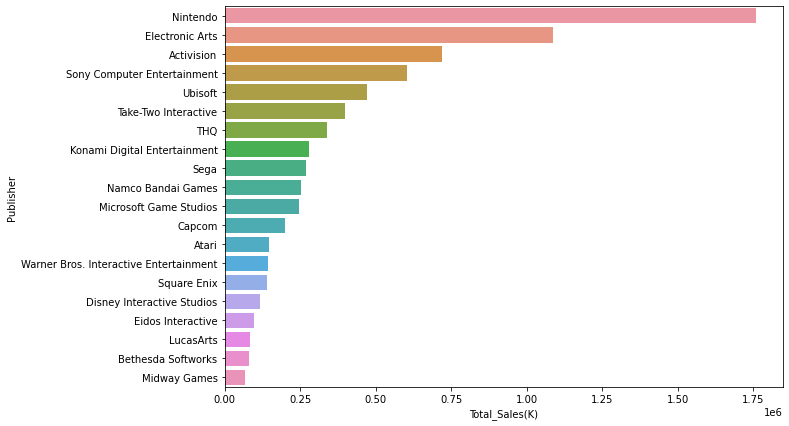

In [257]:
plt.figure(figsize = (10, 7))
sns.barplot(data = df_pub.reset_index().head(20), x = 'Total_Sales(K)', y = 'Publisher')

- Publisher 별 매출액을 보면 Nintendo 사가 압도적으로 많다.

In [253]:
df_platform = df_new.drop('Year', axis = 1).groupby('Platform').sum().sort_values('Total_Sales(K)', ascending = False)
df_platform.head()

,NA_Sales(K),EU_Sales(K),JP_Sales(K),Other_Sales(K),Total_Sales(K)
Platform,,,,,
PS2,568540.0,332030.0,134100.0,187770.0,1222440.0
X360,593780.0,277900.0,12290.0,84620.0,968590.0
PS3,388000.0,339710.0,78560.0,140470.0,946740.0
Wii,495100.0,260780.0,65790.0,78480.0,900150.0
DS,387930.0,194050.0,174970.0,60240.0,817190.0


In [259]:
df_platform = df_platform[['Total_Sales(K)']]
df_platform.head()

,Total_Sales(K)
Platform,
PS2,1222440.0
X360,968590.0
PS3,946740.0
Wii,900150.0
DS,817190.0


In [260]:
from scipy import stats

stats.chisquare(df_platform)

Power_divergenceResult(statistic=array([12695251.90304921]), pvalue=array([0.]))

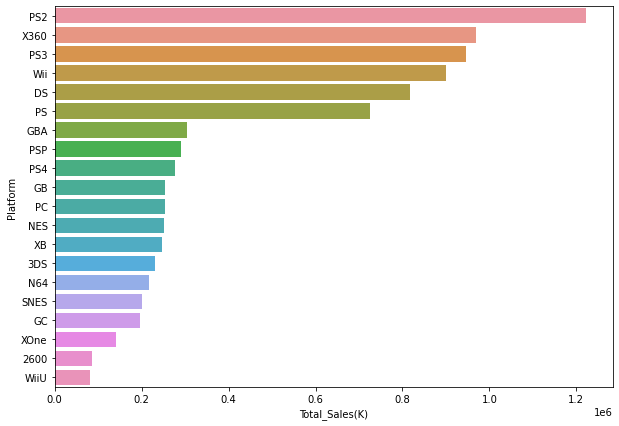

In [261]:
plt.figure(figsize = (10, 7))
sns.barplot(data = df_platform.reset_index().head(20), x = 'Total_Sales(K)', y = 'Platform')

- platform 별로 살펴봤을 땐 닌텐도 Wii 보다 PS2, PS3, X360의 매출액이 더 많았다.
- 아무래도 해당 플랫폼에서 나온 게임의 숫자에서 엄청난 차이가 났지 않을까?(가설)

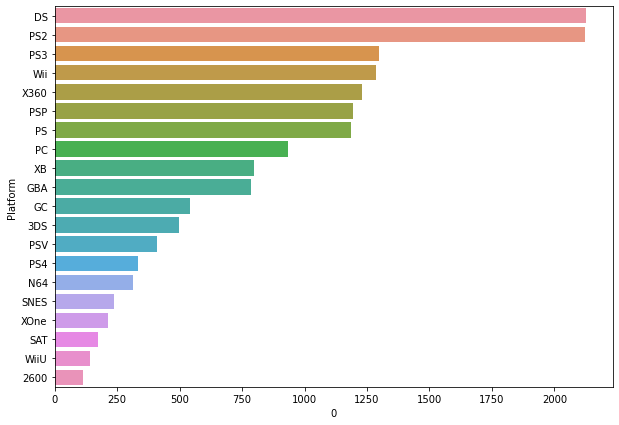

In [275]:
plt.figure(figsize = (10,7))
sns.barplot(data = pd.DataFrame(df_new.value_counts('Platform')).reset_index().head(20), x = 0, y = 'Platform')

- PS2와 PS3, Wii 등은 게임의 수 많큼 매출이 났지만, DS의 경우 게임은 많으나 매출은 많이 내지 못했다.
- X360의 경우, 반대로 게임의 수는 Wii보다 적지만 매출은 2위를 기록했다.

In [276]:
pd.DataFrame(df_new.value_counts('Platform')).head()

,0
Platform,
DS,2127
PS2,2121
PS3,1299
Wii,1284
X360,1231


그렇다면 왜 저런 차이가 발생한 것인가?

- 각 플랫폼별 20000k 이상 기록한 게임들이 얼마나 있나?

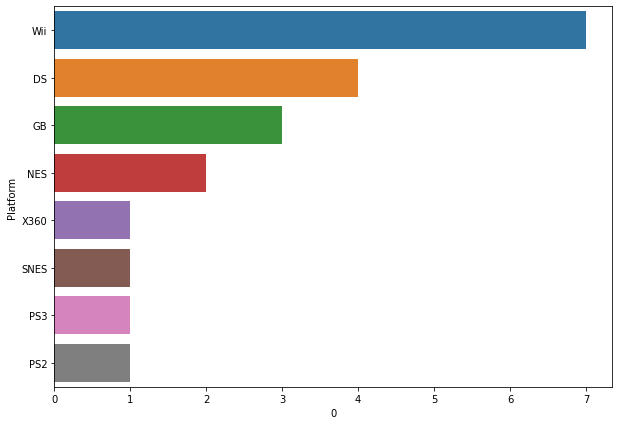

In [289]:
plt.figure(figsize = (10,7))
sns.barplot(data = pd.DataFrame(df_new[df_new['Total_Sales(K)'] >= 20000].value_counts('Platform')).reset_index().head(20), x = 0, y = 'Platform')

- 플랫폼별로 20000K 이상 기록한 순위를 보면 Nintendo 사의 Wii와 DS가 1, 2위를 차지했고 PS2, PS3, X360은 별로 없다.

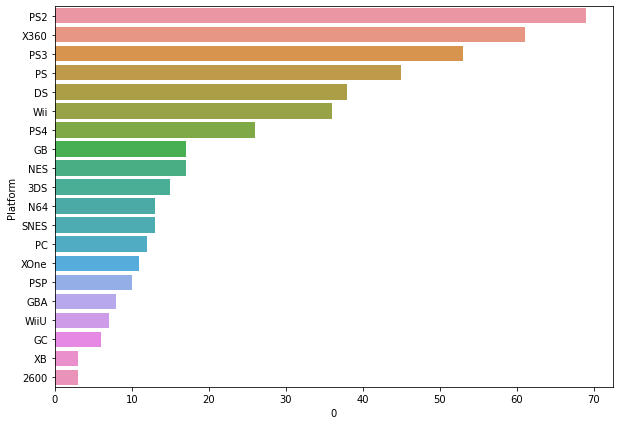

In [286]:
plt.figure(figsize = (10,7))
sns.barplot(data = pd.DataFrame(df_new[df_new['Total_Sales(K)'] >= 3000].value_counts('Platform')).reset_index().head(20), x = 0, y = 'Platform')

- 3000K 이상 기록한 게임의 수를 살펴보니 플랫폼별 순위가 비슷하게 나온다.
- 엄청난 매출을 기록한 게임은 없지만, 많은 게임이 출시된 만큼 어느정도 성적은 거두는 게임들이 많았기 때문에 플랫폼별 순위가 높은 것으로 판단된다.

### 지역별 게임 매출액

In [105]:
df_money_by_y.columns

Index(['NA_Sales(K)', 'EU_Sales(K)', 'JP_Sales(K)', 'Other_Sales(K)',
       'Total_Sales(K)'],
      dtype='object')

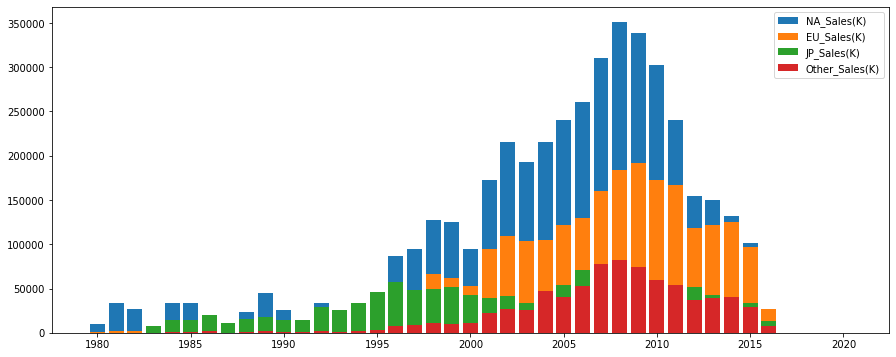

In [106]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(data = df_money_by_y.reset_index(), x = 'Year', height= 'NA_Sales(K)')
ax.bar(data = df_money_by_y.reset_index(), x = 'Year', height= 'EU_Sales(K)')
ax.bar(data = df_money_by_y.reset_index(), x = 'Year', height= 'JP_Sales(K)')
ax.bar(data = df_money_by_y.reset_index(), x = 'Year', height= 'Other_Sales(K)')
ax.legend(['NA_Sales(K)', 'EU_Sales(K)', 'JP_Sales(K)', 'Other_Sales(K)'])

- 이전까진 NA 지역에서 많은 매출이 있었으나 2010년도 이후로 차이가 좁혀지기 시작, 2016년부터 EU지역에서 가장 많은 매출이 발생한다

## 결론

- 게임을 출시했을 때 큰 인기를 얻으려면 플랫폼의 선택도 중요하다.
- Sports 장르에 대한 NA, EU 지역의 인기는 항상 높았다.
- 현 시점에 10년 전의 Wii 처럼 혁신적인 플랫폼이 나올 기술력이 갖추어 졌다.
- AR, VR등을 활용한 새로운 플랫폼으로 JP, Other 지역의 고객을 만족시킬 수 있는 Sports 장르의 게임을 만들면 많은 매출을 낼 것으로 기대된다.